<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ulaanbaatar-PM2.5-Prediction" data-toc-modified-id="Ulaanbaatar-PM2.5-Prediction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ulaanbaatar PM2.5 Prediction</a></span></li><li><span><a href="#Importing-data-and-assumptions" data-toc-modified-id="Importing-data-and-assumptions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing data and assumptions</a></span><ul class="toc-item"><li><span><a href="#Remove-unneeded-features" data-toc-modified-id="Remove-unneeded-features-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Remove unneeded features</a></span></li></ul></li><li><span><a href="#Visualizing-Features" data-toc-modified-id="Visualizing-Features-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualizing Features</a></span></li><li><span><a href="#Clean-Data" data-toc-modified-id="Clean-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Clean Data</a></span><ul class="toc-item"><li><span><a href="#Create-canonical-date-feature" data-toc-modified-id="Create-canonical-date-feature-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Create canonical date feature</a></span></li><li><span><a href="#Create-previous-value-features" data-toc-modified-id="Create-previous-value-features-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Create previous value features</a></span></li><li><span><a href="#Handling-outliers" data-toc-modified-id="Handling-outliers-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Handling outliers</a></span></li><li><span><a href="#Handle-NaNs" data-toc-modified-id="Handle-NaNs-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Handle NaNs</a></span></li><li><span><a href="#990-DIR-Values" data-toc-modified-id="990-DIR-Values-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>990 DIR Values</a></span></li></ul></li><li><span><a href="#Visualizing-Cleaned-Features" data-toc-modified-id="Visualizing-Cleaned-Features-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Visualizing Cleaned Features</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Convert-Value-Field-from-mg-to-µg" data-toc-modified-id="Convert-Value-Field-from-mg-to-µg-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Convert Value Field from mg to µg</a></span></li><li><span><a href="#Create-pollution-classes" data-toc-modified-id="Create-pollution-classes-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Create pollution classes</a></span></li><li><span><a href="#Convert-cyclical-&amp;-circular-features" data-toc-modified-id="Convert-cyclical-&amp;-circular-features-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Convert cyclical &amp; circular features</a></span></li><li><span><a href="#Convert-TEMP-and-DEWP-from-F-to-C" data-toc-modified-id="Convert-TEMP-and-DEWP-from-F-to-C-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Convert TEMP and DEWP from F to C</a></span></li><li><span><a href="#Convert-SPD-from-Mph-to-Kph" data-toc-modified-id="Convert-SPD-from-Mph-to-Kph-6.5"><span class="toc-item-num">6.5&nbsp;&nbsp;</span>Convert SPD from Mph to Kph</a></span></li><li><span><a href="#Create-day-of-the-week-feature" data-toc-modified-id="Create-day-of-the-week-feature-6.6"><span class="toc-item-num">6.6&nbsp;&nbsp;</span>Create day of the week feature</a></span></li><li><span><a href="#More-Exploration" data-toc-modified-id="More-Exploration-6.7"><span class="toc-item-num">6.7&nbsp;&nbsp;</span>More Exploration</a></span></li></ul></li><li><span><a href="#Split-into-Training-and-Test-Data" data-toc-modified-id="Split-into-Training-and-Test-Data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Split into Training and Test Data</a></span><ul class="toc-item"><li><span><a href="#Implement-SMOTE" data-toc-modified-id="Implement-SMOTE-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Implement SMOTE</a></span></li></ul></li><li><span><a href="#Implement-ML-Algorithms" data-toc-modified-id="Implement-ML-Algorithms-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Implement ML Algorithms</a></span></li><li><span><a href="#Evaluate-Models" data-toc-modified-id="Evaluate-Models-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Evaluate Models</a></span></li></ul></div>

# Ulaanbaatar PM2.5 Prediction

The purpose of this notebook is to create a predictive model of PM2.5 levels in Ulaanbaatar, Mongolia. 

# Importing data and assumptions

The data exists in a CSV file that has the AQI data from the US Embassy in Ulaanbaatar and weather data from the Buyant Uhaa weather station. 

A few key facts about the AQI data:
- AQI contains only PM2.5 data
- AQI above 500 may not always be captured as the US AQI scale officially only goes to 500.

A few key facts about the weather data:
- The weather station is located approximately 30 kilometers away from the air quality station
- The location of the weather station is in the westernmost part of the valley Ulaanbaatar sits in

In [1]:
# Import relevant items
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline


In [2]:
# Let's first load the data and take a look at what we have.
df = pd.read_csv('weather-and-aqi-v5.csv')

The head of the dataframe shows lots of columns and LOTS of NaN's.

In [3]:
print(df.head())
print(df.columns)

                          Source.Name         Site       Parameter  \
0  Ulaanbaatar_ HourlyPM25_201510.CSV  Ulaanbaatar  2/5/2018 12:00   
1  Ulaanbaatar_ HourlyPM25_201510.CSV  Ulaanbaatar  2/5/2018 12:00   
2  Ulaanbaatar_ HourlyPM25_201510.CSV  Ulaanbaatar  2/5/2018 12:00   
3  Ulaanbaatar_ HourlyPM25_201510.CSV  Ulaanbaatar  2/5/2018 12:00   
4  Ulaanbaatar_ HourlyPM25_201510.CSV  Ulaanbaatar  2/5/2018 12:00   

       Date (LST)  Year  Month  Day  Hour      Date Key  Value ...      SLP  \
0  10/1/2015 0:00  2015      1    1     0  2.020000e+11  0.176 ...   1022.4   
1  10/1/2015 1:00  2015      1    1     1  2.020000e+11  0.071 ...      NaN   
2  10/1/2015 2:00  2015      1    1     2  2.020000e+11  0.077 ...      NaN   
3  10/1/2015 3:00  2015      1    1     3  2.020000e+11  0.058 ...   1017.0   
4  10/1/2015 4:00  2015      1    1     4  2.020000e+11  0.056 ...      NaN   

     ALT    STP  MAX   MIN  PCP01  PCP06  PCP24  PCPXX   SD  
0  30.00    NaN  NaN  30.0    NaN    NaN  

In [4]:
df.dtypes

Source.Name     object
Site            object
Parameter       object
Date (LST)      object
Year             int64
Month            int64
Day              int64
Hour             int64
Date Key       float64
Value          float64
Unit            object
AQI            float64
Duration        object
USAF           float64
WBAN           float64
Date Key.1     float64
DIR            float64
SPD            float64
GUS            float64
CLG            float64
SKC             object
L              float64
M              float64
H              float64
VSB            float64
MW             float64
MW_1           float64
MW_2           float64
MW_3           float64
AW             float64
AW_4           float64
AW_5           float64
AW_6           float64
W              float64
TEMP           float64
DEWP           float64
SLP            float64
ALT            float64
STP            float64
MAX            float64
MIN            float64
PCP01          float64
PCP06          float64
PCP24      

There are a large number of columns that are unneccesary. There are duplicate columns for Date, Year, Month, Day, and Hour. There are also columns for location name, station id, units, and intervals of measurement that are not useful in analysis. For now we can leave these columns in. 

In [5]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = [16,9]

## Remove unneeded features

Thus far we have looked at the data available and relationships of some key features. Another key factor is determining what input data will be available to predict PM2.5. This model aims to predict PM2.5 levels into the future. This is possible due to weather forecasting providing inputs for the model. As such we will be limited to the data that is available from the weather forecast provider. Data that is available from several weather API forecasters:

- Temperature
- Humidity
- Wind speed
- Wind direction
- Dew point

To start, let's drop columns that clearly have no value as features.

Source.Name, Site, Parameter, Unit, Duration, USAF, and WBAN are the same for every row, and as such are not useful features. These are site identifiers for the weather station, the duration of measurement (which is constant), and the unit of PM2.5 measurement (which is in milligrams per cubic meter).

Date Key.1, Year.1, Month.1, Day.1, and Hour.1 are duplicates of the original date features. These were used to create the date key that was then used to combine the PM2.5 and weather data sets. Removing these will cause no harm.

Earlier we determined that hour of day and month were both possibly useful predictors, and as such we will keep them in our data. However Year, Day, Date Key aren't needed. We will turn the Date (LST) feature into a datetime feature later.

As we only need one measure of air pollution, and the Value field is labeled with a specific unit, we will drop AQI in favor of PM2.5 Value.

The remaining fields are either 1) date fields, 2) PM2.5 values or their derived AQI values, and 3) weather data. As noted before we will only have a few features available for use in prediction. As such we will remove the rest. Below is an inventory of the available weather features. Those marked in bold will be kept, all others will be removed.

- **DIR - WIND DIRECTION IN COMPASS DEGREES, 990 = VARIABLE, REPORTED AS** "***" WHEN AIR IS CALM (SPD WILL THEN BE 000)
- **SPD** & GUS = **WIND SPEED** & GUST IN MILES PER HOUR 
- CLG = CLOUD CEILING--LOWEST OPAQUE LAYER
- SKC = SKY COVER
- L = LOW CLOUD TYPE, SEE BELOW
- M = MIDDLE CLOUD TYPE, SEE BELOW
- H = HIGH CLOUD TYPE, SEE BELOW 
- VSB = VISIBILITY IN STATUTE MILES TO NEAREST TENTH 
- MW MW1 MW2 MW3 = MANUALLY OBSERVED PRESENT WEATHER--LISTED BELOW IN PRESENT WEATHER TABLE
- AW AW1 AW2 AW3 = AUTO-OBSERVED PRESENT WEATHER--LISTED BELOW IN PRESENT WEATHER TABLE
- W = PAST WEATHER INDICATOR, SEE BELOW
- **TEMP & DEWP = TEMPERATURE & DEW POINT IN FAHRENHEIT**
- SLP = SEA LEVEL PRESSURE IN MILLIBARS TO NEAREST TENTH 
- ALT = ALTIMETER SETTING IN INCHES TO NEAREST HUNDREDTH
- STP = STATION PRESSURE IN MILLIBARS TO NEAREST TENTH
- MAX = MAXIMUM TEMPERATURE IN FAHRENHEIT (TIME PERIOD VARIES)
- MIN = MINIMUM TEMPERATURE IN FAHRENHEIT (TIME PERIOD VARIES)
- PCP01 = 1-HOUR LIQUID PRECIP REPORT IN INCHES AND HUNDREDTHS
- PCP06 = 6-HOUR LIQUID PRECIP REPORT IN INCHES AND HUNDREDTHS
- PCP24 = 24-HOUR LIQUID PRECIP REPORT IN INCHES AND HUNDREDTHS
- PCPXX = LIQUID PRECIP REPORT IN INCHES AND HUNDREDTHS
- SD = SNOW DEPTH IN INCHES  

In [6]:
#drop unneeded features
df = df.drop(['Year', 'Day', 'Date Key', 'Date Key.1', 'AQI', 'Source.Name', 'Site', 'Parameter', 'Unit', 'Duration', 
              'USAF', 'WBAN', 'GUS', 'CLG', 'SKC', 'L', 'M', 'H', 'VSB', 'MW', 'MW_1', 'MW_2', 'MW_3', 'AW', 'AW_4', 
              'AW_5', 'AW_6', 'W', 'SLP', 'ALT', 'STP', 'MAX', 'MIN', 'PCP01', 'PCP06', 'PCP24', 'PCPXX', 'SD'], axis=1)

df.columns

Index(['Date (LST)', 'Month', 'Hour', 'Value', 'DIR', 'SPD', 'TEMP', 'DEWP'], dtype='object')

# Visualizing Features

**Let's plot the various features (pollution level, time, month, wind speed, etc) to find any relationships.**

When plotting the PM2.5 concentration by month you can clearly see that winter months have a much larger variation in pollution levels, including some very high levels.

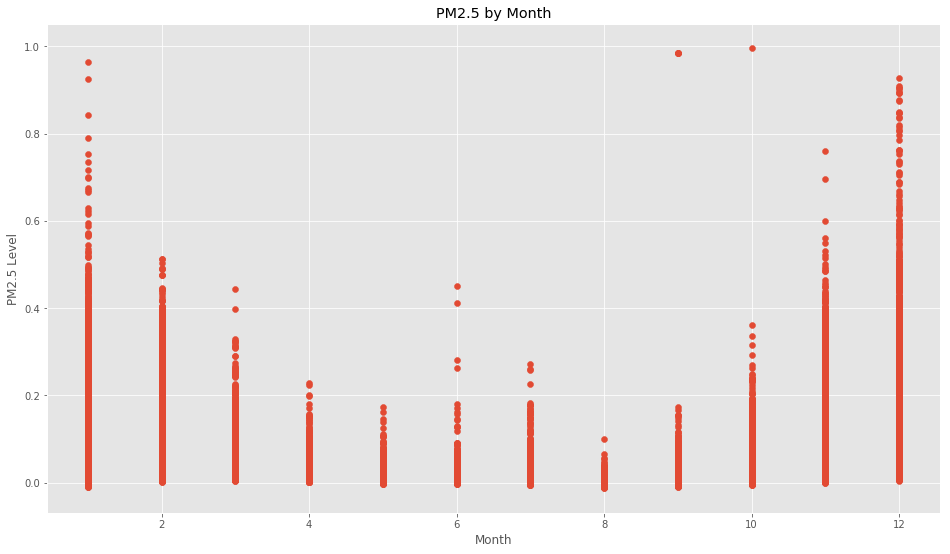

In [7]:
x = df['Month']
y = df['Value']
plt.scatter(x,y)
plt.xlabel('Month')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Month')
plt.show()

Looking at the value plot by hour you can see there are two spikes each day, one between 9-11AM and the other starting around 20 and continuing through the night until 4.

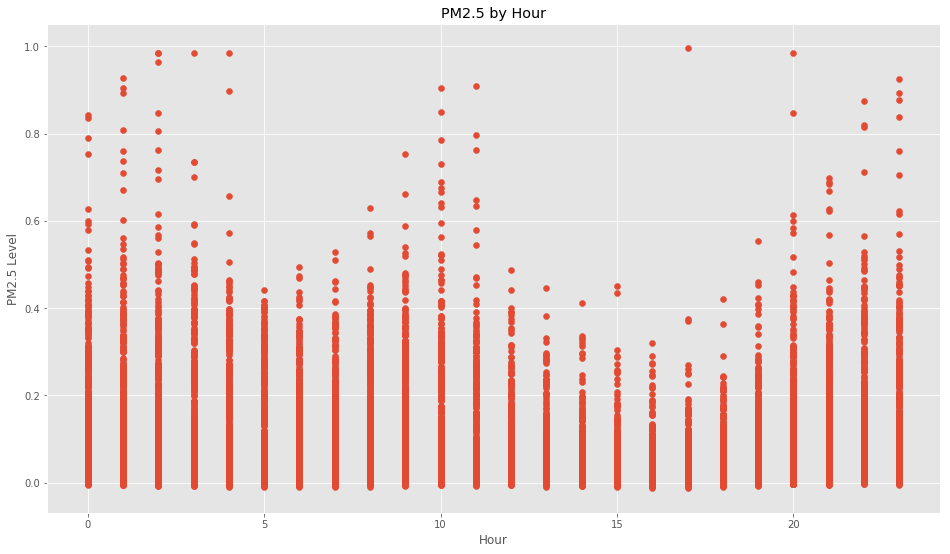

In [8]:
x = df['Hour']
y = df['Value']
plt.scatter(x,y)
plt.xlabel('Hour')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Hour')
plt.show()

At higher windspeeds you notice a big drop in the recorded PM2.5 levels. It seems wind speed may be a good feature to predict PM2.5.

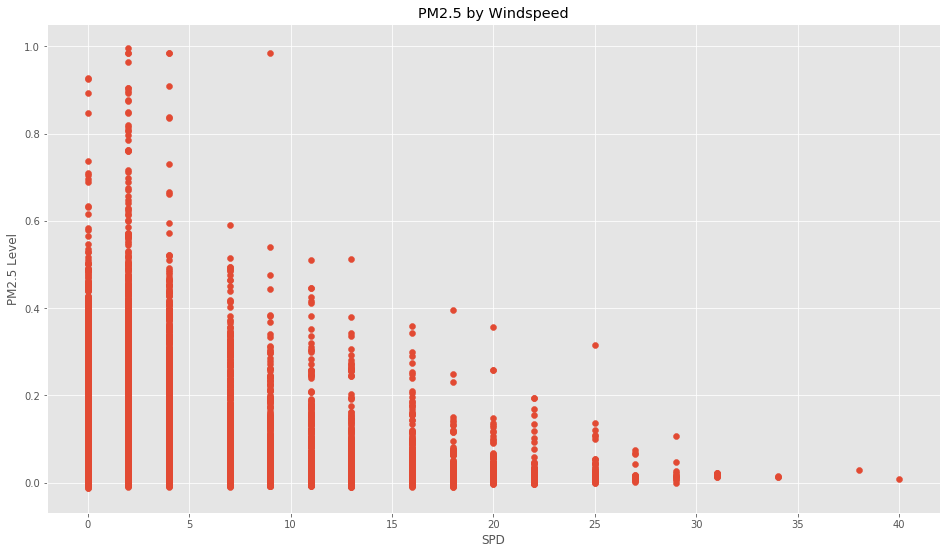

In [9]:
x = df['SPD']
y = df['Value']
plt.scatter(x,y)
plt.xlabel('SPD')
plt.ylabel('PM2.5 Level')
plt.title('PM2.5 by Windspeed')
plt.show()

### Determinations made from visualizations

- It is clear that at higher windspeed AQI is lower. Wind speed is possibly a good predictor.
- Winter months are a large predictor of AQI. Month is possibly a good predictor.
- While definite spikes are seen at certain times of day (from 5-11AM), values at all times of day have a high variance. Nevertheless it does seem somewhat predictive.
- Wind direction is given in a 360 degree arc, but variable wind directions are given as 990.
- Hours are given on a range from 0-24

== Next Steps ==
- Remove unneeded features (those that will be unavailable as inputs) - cleaning
- Find which features have NaNs, determine what to do with them - cleaning
- Change direction and hour of day to something machine learning models will understand better (more on this later) - feature engineering
- Determine how to handle dates - feature engineering

# Clean Data

## Create canonical date feature

As there are several date features, we can reduce these to one canonical one that is in a format that is easily parseable by Python or other programs. Also let's rename the 'Date (LST)' column to simply Date, as spaces in columns aren't ideal.

In [10]:
from datetime import datetime

df['Date (LST)'] = pd.to_datetime(df['Date (LST)'])
df = df.rename(columns={"Date (LST)": "Date"})

In [11]:
df.head()

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP
0,2015-10-01 00:00:00,1,0,0.176,NaN,NaN,35.0,23.0
1,2015-10-01 01:00:00,1,1,0.071,NaN,0.0,36.0,27.0
2,2015-10-01 02:00:00,1,2,0.077,NaN,0.0,43.0,27.0
3,2015-10-01 03:00:00,1,3,0.058,210.0,4.0,47.0,29.0
4,2015-10-01 04:00:00,1,4,0.056,990.0,11.0,52.0,30.0


Incidentally now that we have a properly formatted Date field we can plot a time series of PM2.5 values over the entire dataset. Considering the length of time this may be messy, but let's give it a go.

In [12]:
def time_series(start, end):
    time_series_df = df[['Date', 'Value']][(df['Date'] >= start) & (df['Date'] <= end)]
    x = time_series_df.Date
    y = time_series_df.Value
    plt.plot(x,y)
    plt.xlabel('Time')
    plt.ylabel('PM2.5 Value')
    plt.title('PM2.5 Time Series')
    return plt.show();

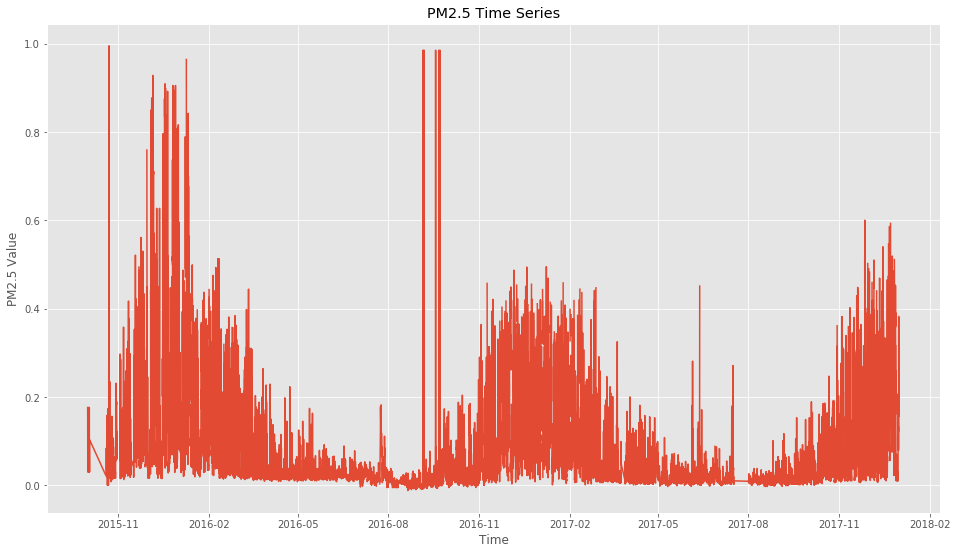

In [13]:
time_series('2015','2018')

The following graph shows a good example of outliers. These would appear to be errors in the data. In the graph above they appear in roughly the middle of the graph.

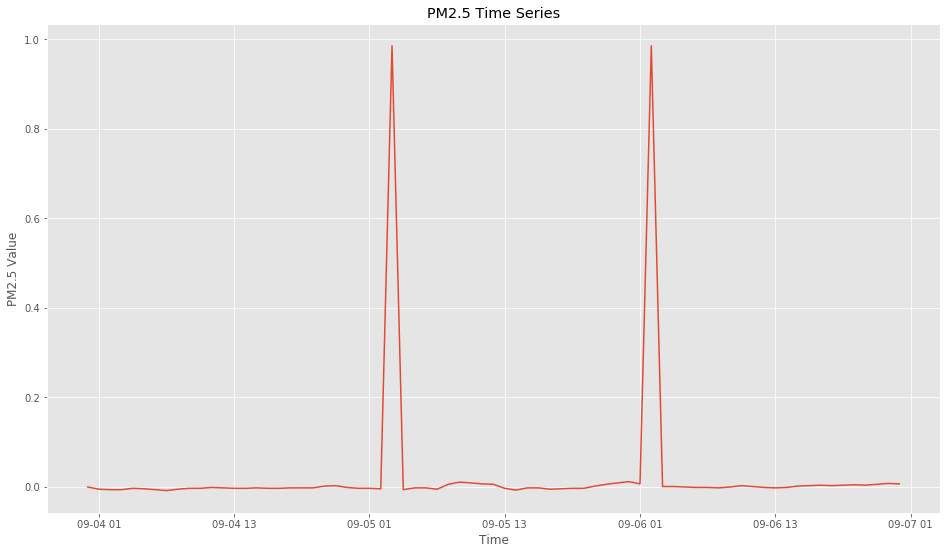

In [14]:
time_series('2016-09-04','2016-09-07')

It is quite clear that PM2.5 has a seasonal component. However it is also clear that there are outliers that are outside the normal trend. We can deal with these in the next section.

## Create previous value features

In [15]:
df.head()

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP
0,2015-10-01 00:00:00,1,0,0.176,NaN,NaN,35.0,23.0
1,2015-10-01 01:00:00,1,1,0.071,NaN,0.0,36.0,27.0
2,2015-10-01 02:00:00,1,2,0.077,NaN,0.0,43.0,27.0
3,2015-10-01 03:00:00,1,3,0.058,210.0,4.0,47.0,29.0
4,2015-10-01 04:00:00,1,4,0.056,990.0,11.0,52.0,30.0


In [16]:
df['Value_1'] = df.Value.shift(periods=1)
df['TEMP_1'] = df.TEMP.shift(periods=1)
df['SPD_1'] = df.SPD.shift(periods=1)
df['DEWP_1'] = df.DEWP.shift(periods=1)
df['DIR_1'] = df.DIR.shift(periods=1)
df['Value_2'] = df.Value.shift(periods=2)
df['TEMP_2'] = df.TEMP.shift(periods=2)
df['SPD_2'] = df.SPD.shift(periods=2)
df['DEWP_2'] = df.DEWP.shift(periods=2)
df['DIR_2'] = df.DIR.shift(periods=2)
df['Value_3'] = df.Value.shift(periods=3)
df['TEMP_3'] = df.TEMP.shift(periods=3)
df['SPD_3'] = df.SPD.shift(periods=3)
df['DEWP_3'] = df.DEWP.shift(periods=3)
df['DIR_3'] = df.DIR.shift(periods=3)

In [17]:
df.head(10)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_2,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3
0,2015-10-01 00:00:00,1,0,0.176,NaN,NaN,35.0,23.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-10-01 01:00:00,1,1,0.071,NaN,0.0,36.0,27.0,0.176,35.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-10-01 02:00:00,1,2,0.077,NaN,0.0,43.0,27.0,0.071,36.0,...,0.176,35.0,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-10-01 03:00:00,1,3,0.058,210.0,4.0,47.0,29.0,0.077,43.0,...,0.071,36.0,0.0,27.0,NaN,0.176,35.0,NaN,23.0,NaN
4,2015-10-01 04:00:00,1,4,0.056,990.0,11.0,52.0,30.0,0.058,47.0,...,0.077,43.0,0.0,27.0,NaN,0.071,36.0,0.0,27.0,NaN
5,2015-10-01 05:00:00,1,5,0.036,270.0,16.0,55.0,30.0,0.056,52.0,...,0.058,47.0,4.0,29.0,210.0,0.077,43.0,0.0,27.0,NaN
6,2015-10-01 06:00:00,1,6,0.030,250.0,18.0,57.0,30.0,0.036,55.0,...,0.056,52.0,11.0,30.0,990.0,0.058,47.0,4.0,29.0,210.0
7,2015-10-01 07:00:00,1,7,0.044,990.0,22.0,57.0,28.0,0.030,57.0,...,0.036,55.0,16.0,30.0,270.0,0.056,52.0,11.0,30.0,990.0
8,2015-10-01 08:00:00,1,8,0.103,300.0,22.0,61.0,30.0,0.044,57.0,...,0.030,57.0,18.0,30.0,250.0,0.036,55.0,16.0,30.0,270.0
9,2015-10-01 09:00:00,1,9,0.176,270.0,16.0,59.0,28.0,0.103,61.0,...,0.044,57.0,22.0,28.0,990.0,0.030,57.0,18.0,30.0,250.0


## Handling outliers
Let's handle those outlier points in the Value feature. First lets take a look at the date range from the graph above.

In [18]:
# Select the time frame from the graph above
df[['Date', 'Value']][(df['Date'] >= '2016-09-05 01') & (df['Date'] <= '2016-09-06 04')]

,Date,Value
7594,2016-09-05 01:00:00,-0.004
7595,2016-09-05 02:00:00,-0.005
7596,2016-09-05 03:00:00,0.985
7597,2016-09-05 04:00:00,-0.007
7598,2016-09-05 05:00:00,-0.003
7599,2016-09-05 06:00:00,-0.003
7600,2016-09-05 07:00:00,-0.006
7601,2016-09-05 08:00:00,0.005
7602,2016-09-05 09:00:00,0.010
7603,2016-09-05 10:00:00,0.008


**Determinations**

After exploring the spikes where PM2.5 values go above 500 we see that the majority of them are in the 2015-2016 winter. In 2016-2017 winter these spikes don't exist. We know from external reports that pollution is actually getting worse year over year. This leads to the conclusion that these points are possible in error and should be removed. 

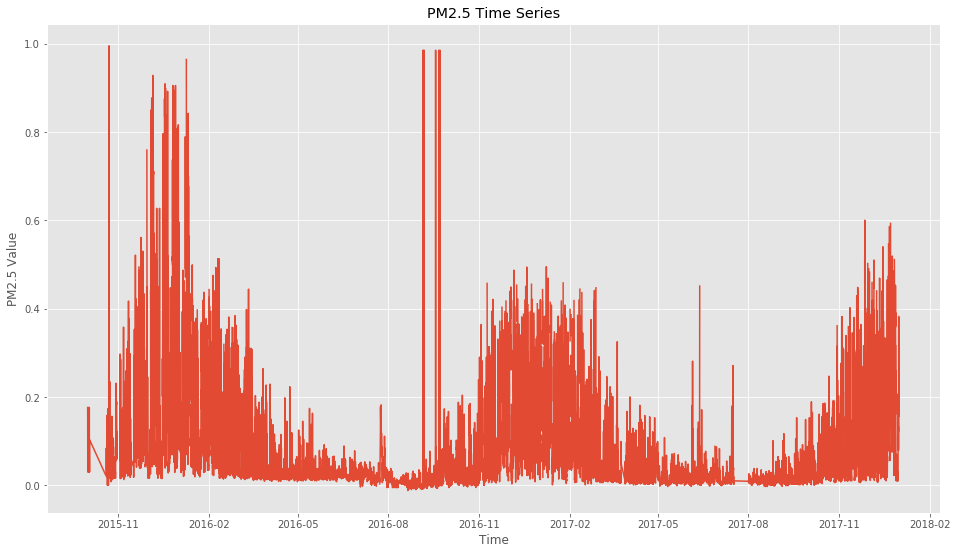

In [19]:
time_series('2015','2018')

In [20]:
df = df[df.Value <= .6]

Next up is the early part of the data set. Between 2015-09 and around the middle of 2015-10 the data appears to be unreliable. The data in this period does not follow what would be expected of pollution levels. This is the time when the pollution monitoring station was installed, so it is logical to belive that the station could have some calibration or other maintenance during this initial phase.

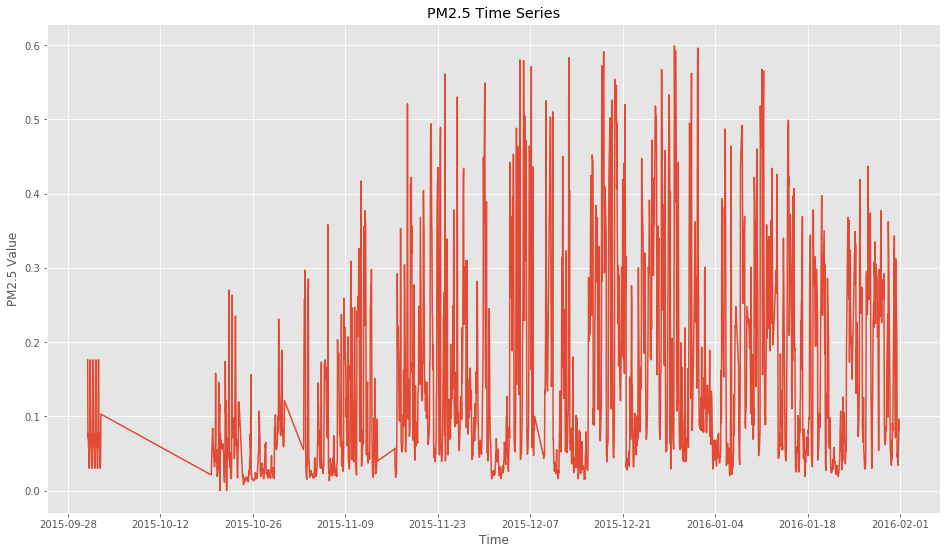

In [21]:
time_series('2015-10','2016-2')

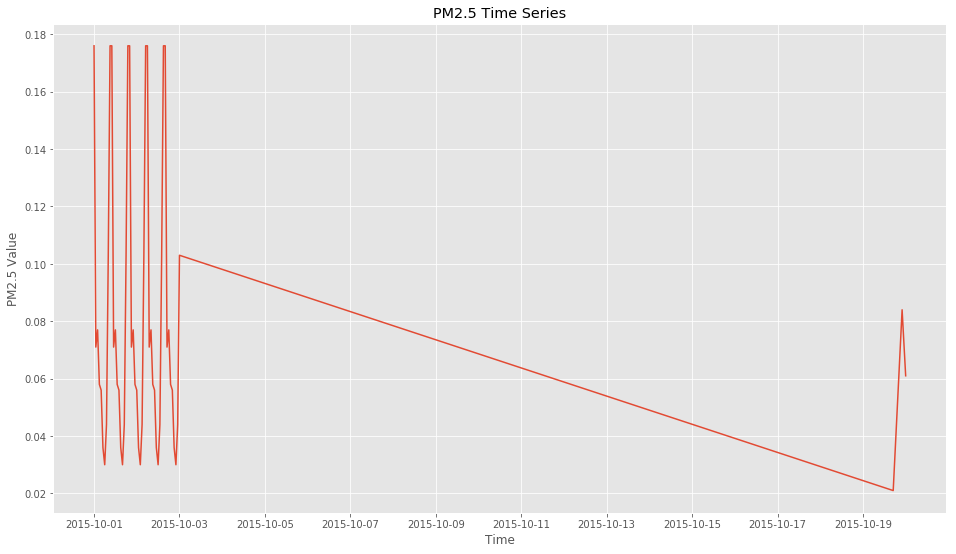

In [22]:
time_series('2015','2015-10-20')

In [23]:
print("Shape before: ", df.shape)
df = df[df.Date > '2015-10-20 01']
# Check shape again to confirm
print("Shape after: ", df.shape)

Shape before:  (18610, 23)
Shape after:  (18558, 23)


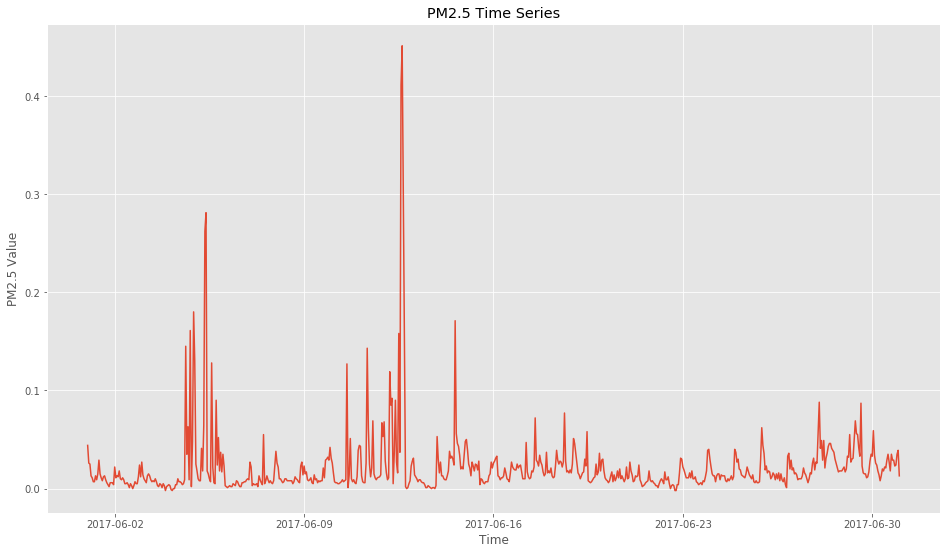

In [24]:
time_series('2017-6','2017-7')

After removing these outliers let's take a look at the full time series plot one more time.

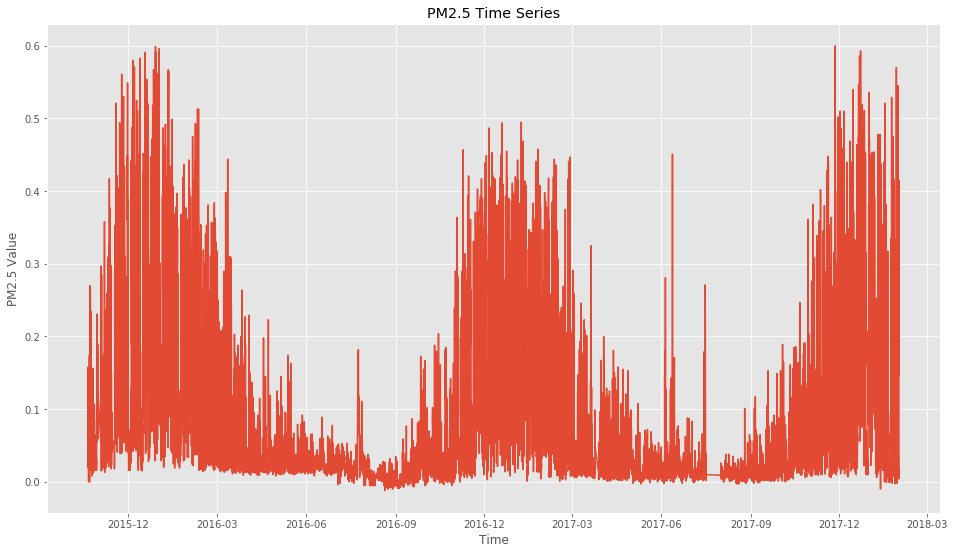

In [25]:
time_series('2015','2018-02')

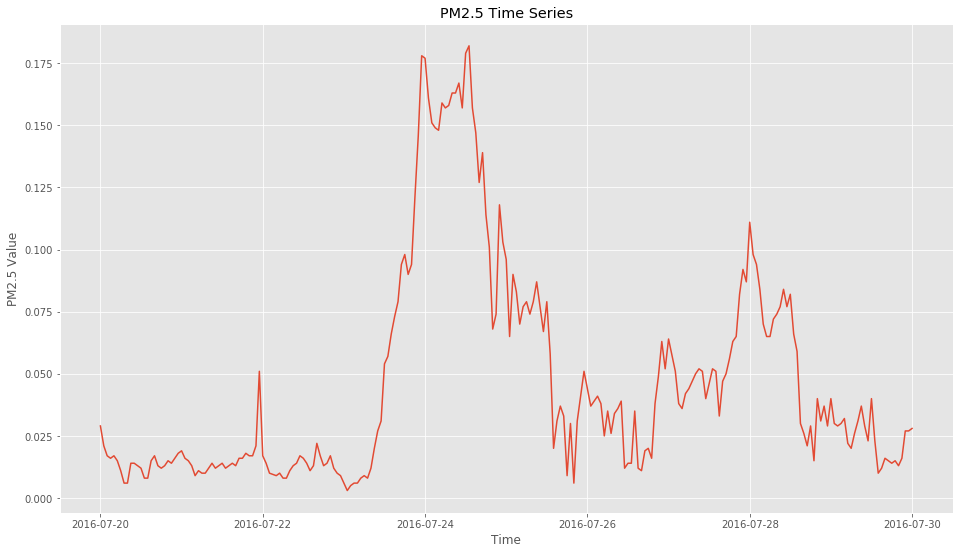

In [26]:
time_series('2016-07-20','2016-07-30')

In [27]:
df.head()

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_2,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3
52,2015-10-20 02:00:00,10,2,0.048,NaN,0.0,30.0,16.0,0.061,18.0,...,0.084,18.0,2.0,10.0,990.0,0.021,28.0,2.0,16.0,990.0
53,2015-10-20 05:00:00,10,5,0.032,990.0,4.0,41.0,23.0,0.048,30.0,...,0.061,18.0,NaN,15.0,NaN,0.084,18.0,2.0,10.0,990.0
54,2015-10-20 08:00:00,10,8,0.071,990.0,11.0,39.0,30.0,0.032,41.0,...,0.048,30.0,0.0,16.0,NaN,0.061,18.0,NaN,15.0,NaN
55,2015-10-20 09:00:00,10,9,0.158,990.0,16.0,40.0,29.0,0.071,39.0,...,0.032,41.0,4.0,23.0,990.0,0.048,30.0,0.0,16.0,NaN
56,2015-10-20 10:00:00,10,10,0.052,990.0,7.0,36.0,32.0,0.158,40.0,...,0.071,39.0,11.0,30.0,990.0,0.032,41.0,4.0,23.0,990.0


## Handle NaNs

As stated at the beginning, there are quite a few NaN values in our dataset. Most of them have been taken out by dropping columns as the majority of some of the weather features had null values.

Process for handling NaNs
1. Determine where NaNs exist
2. Decide on a per feature (column) basis whether to drop NaN records (rows)
3. Decide on a per feature (column) basis if/how to interpolate data for NaN records. 
    - Interpolating can be either a mean of previous and next values, a constant number, or some other method. 

In [28]:
# Are there null values in our dataset?
df.isnull().values.any()

True

In [29]:
df.describe()

,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,SPD_1,...,Value_2,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3
count,18558.000000,18558.000000,18558.000000,14525.000000,16810.000000,18448.000000,18445.000000,18190.000000,18447.000000,16810.000000,...,18043.000000,18444.000000,16800.000000,18442.000000,14537.000000,17944.000000,18444.000000,16795.000000,18443.000000,14545.000000
mean,6.698890,11.572206,0.070977,592.627194,5.557704,27.140178,12.865329,0.068499,27.131403,5.562582,...,0.068240,27.126057,5.568929,12.846492,591.312513,0.068484,27.124105,5.569991,12.846392,590.574080
std,3.635456,6.884253,0.096862,390.736048,5.222690,30.642773,24.492980,0.097777,30.647276,5.218725,...,0.099223,30.655933,5.221906,24.511839,391.021424,0.100466,30.657963,5.213362,24.510992,390.946472
min,1.000000,0.000000,-0.012000,10.000000,0.000000,-42.000000,-49.000000,-0.012000,-42.000000,0.000000,...,-0.012000,-42.000000,0.000000,-49.000000,10.000000,-0.012000,-42.000000,0.000000,-49.000000,10.000000
25%,4.000000,6.000000,0.013000,220.000000,2.000000,0.000000,-7.000000,0.013000,0.000000,2.000000,...,0.013000,0.000000,2.000000,-8.000000,220.000000,0.013000,0.000000,2.000000,-8.000000,220.000000
50%,7.000000,12.000000,0.028000,350.000000,4.000000,28.000000,14.000000,0.027000,28.000000,4.000000,...,0.027000,28.000000,4.000000,14.000000,350.000000,0.027000,28.000000,4.000000,14.000000,350.000000
75%,10.000000,18.000000,0.084000,990.000000,9.000000,54.000000,32.000000,0.080000,54.000000,9.000000,...,0.078000,54.000000,9.000000,32.000000,990.000000,0.077250,54.000000,9.000000,32.000000,990.000000
max,12.000000,23.000000,0.600000,990.000000,40.000000,99.000000,64.000000,0.995000,99.000000,40.000000,...,0.995000,99.000000,40.000000,64.000000,990.000000,0.995000,99.000000,40.000000,64.000000,990.000000


In [30]:
# Show rows where any cell has a NaN
df[df.isnull().any(axis=1)]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_2,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3
52,2015-10-20 02:00:00,10,2,0.048,NaN,0.0,30.0,16.0,0.061,18.0,...,0.084,18.0,2.0,10.0,990.0,0.021,28.0,2.0,16.0,990.0
53,2015-10-20 05:00:00,10,5,0.032,990.0,4.0,41.0,23.0,0.048,30.0,...,0.061,18.0,NaN,15.0,NaN,0.084,18.0,2.0,10.0,990.0
54,2015-10-20 08:00:00,10,8,0.071,990.0,11.0,39.0,30.0,0.032,41.0,...,0.048,30.0,0.0,16.0,NaN,0.061,18.0,NaN,15.0,NaN
55,2015-10-20 09:00:00,10,9,0.158,990.0,16.0,40.0,29.0,0.071,39.0,...,0.032,41.0,4.0,23.0,990.0,0.048,30.0,0.0,16.0,NaN
58,2015-10-20 12:00:00,10,12,0.055,NaN,NaN,28.0,25.0,0.039,34.0,...,0.052,36.0,7.0,32.0,990.0,0.158,40.0,16.0,29.0,990.0
59,2015-10-20 13:00:00,10,13,0.055,990.0,4.0,25.0,23.0,0.055,28.0,...,0.039,34.0,2.0,30.0,990.0,0.052,36.0,7.0,32.0,990.0
60,2015-10-20 14:00:00,10,14,0.023,190.0,4.0,23.0,19.0,0.055,25.0,...,0.055,28.0,NaN,25.0,NaN,0.039,34.0,2.0,30.0,990.0
61,2015-10-20 15:00:00,10,15,0.019,NaN,NaN,23.0,21.0,0.023,23.0,...,0.055,25.0,4.0,23.0,990.0,0.055,28.0,NaN,25.0,NaN
62,2015-10-20 16:00:00,10,16,0.023,990.0,2.0,21.0,18.0,0.019,23.0,...,0.023,23.0,4.0,19.0,190.0,0.055,25.0,4.0,23.0,990.0
63,2015-10-20 17:00:00,10,17,0.026,NaN,0.0,18.0,16.0,0.023,21.0,...,0.019,23.0,NaN,21.0,NaN,0.023,23.0,4.0,19.0,190.0


Each feature will be handled independently. Some thoughts on each (Date, Month, Hour, Value, DIR, SPD, TEMP, DEWP):

1. **Date, Month,** and **Hour** should have no NaNs, as this was how the two data sets (AQI and weather) were merged. However we should check to be sure.
2. Since we are predicting for the **Value** feature, any record with a NaN for Value should be removed.
3. Currently less is known about **DIR, SPD, TEMP, DEWP**. Let's explore more and see.

In [31]:
# 1. Check if Date, Month, or Hour have NaNs
print("Date contains nulls:", df.Date.isnull().values.any())
print("Month contains nulls:", df.Month.isnull().values.any())
print("Hour contains nulls:", df.Hour.isnull().values.any())

Date contains nulls: False
Month contains nulls: False
Hour contains nulls: False


In [32]:
df.shape

(18558, 23)

In [33]:
# 2. Drop any row where Value is NaN

# Show rows where value is NaN
df[df['Value'].isnull()]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_2,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3


There are a total of 772 rows with NaNs in the Value column out of 14687. We can drop these.

In [34]:
df = df.dropna(axis=0,subset=['Value'])
df.shape

(18558, 23)

For the next 4 features let's explore these a bit to see if there is a pattern to the NaNs so that they can be intelligently replaced.

In [35]:
# Show rows where DIR is NaN
df[df['DIR'].isnull()]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_2,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3
52,2015-10-20 02:00:00,10,2,0.048,NaN,0.0,30.0,16.0,0.061,18.0,...,0.084,18.0,2.0,10.0,990.0,0.021,28.0,2.0,16.0,990.0
58,2015-10-20 12:00:00,10,12,0.055,NaN,NaN,28.0,25.0,0.039,34.0,...,0.052,36.0,7.0,32.0,990.0,0.158,40.0,16.0,29.0,990.0
61,2015-10-20 15:00:00,10,15,0.019,NaN,NaN,23.0,21.0,0.023,23.0,...,0.055,25.0,4.0,23.0,990.0,0.055,28.0,NaN,25.0,NaN
63,2015-10-20 17:00:00,10,17,0.026,NaN,0.0,18.0,16.0,0.023,21.0,...,0.019,23.0,NaN,21.0,NaN,0.023,23.0,4.0,19.0,190.0
64,2015-10-20 18:00:00,10,18,0.028,NaN,NaN,16.0,14.0,0.026,18.0,...,0.023,21.0,2.0,18.0,990.0,0.019,23.0,NaN,21.0,NaN
66,2015-10-20 20:00:00,10,20,0.146,NaN,0.0,16.0,14.0,0.029,18.0,...,0.028,16.0,NaN,14.0,NaN,0.026,18.0,0.0,16.0,NaN
67,2015-10-20 21:00:00,10,21,0.133,NaN,NaN,14.0,12.0,0.146,16.0,...,0.029,18.0,2.0,14.0,990.0,0.028,16.0,NaN,14.0,NaN
69,2015-10-20 23:00:00,10,23,0.108,NaN,0.0,14.0,12.0,0.095,12.0,...,0.133,14.0,NaN,12.0,NaN,0.146,16.0,0.0,14.0,NaN
70,2015-10-21 00:00:00,10,0,0.116,NaN,NaN,16.0,14.0,0.108,14.0,...,0.095,12.0,2.0,10.0,990.0,0.133,14.0,NaN,12.0,NaN
82,2015-10-21 12:00:00,10,12,0.056,NaN,NaN,38.0,16.0,0.063,34.0,...,0.057,39.0,7.0,14.0,220.0,0.057,46.0,13.0,14.0,240.0


In [36]:
# Show rows where SPD is NaN
df[df['SPD'].isnull()]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_2,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3
58,2015-10-20 12:00:00,10,12,0.055,NaN,NaN,28.0,25.0,0.039,34.0,...,0.052,36.0,7.0,32.0,990.0,0.158,40.0,16.0,29.0,990.0
61,2015-10-20 15:00:00,10,15,0.019,NaN,NaN,23.0,21.0,0.023,23.0,...,0.055,25.0,4.0,23.0,990.0,0.055,28.0,NaN,25.0,NaN
64,2015-10-20 18:00:00,10,18,0.028,NaN,NaN,16.0,14.0,0.026,18.0,...,0.023,21.0,2.0,18.0,990.0,0.019,23.0,NaN,21.0,NaN
67,2015-10-20 21:00:00,10,21,0.133,NaN,NaN,14.0,12.0,0.146,16.0,...,0.029,18.0,2.0,14.0,990.0,0.028,16.0,NaN,14.0,NaN
70,2015-10-21 00:00:00,10,0,0.116,NaN,NaN,16.0,14.0,0.108,14.0,...,0.095,12.0,2.0,10.0,990.0,0.133,14.0,NaN,12.0,NaN
82,2015-10-21 12:00:00,10,12,0.056,NaN,NaN,38.0,16.0,0.063,34.0,...,0.057,39.0,7.0,14.0,220.0,0.057,46.0,13.0,14.0,240.0
85,2015-10-21 15:00:00,10,15,0.020,NaN,NaN,21.0,14.0,0.051,27.0,...,0.054,25.0,4.0,14.0,170.0,0.056,38.0,NaN,16.0,NaN
88,2015-10-21 18:00:00,10,18,0.016,NaN,NaN,26.0,10.0,0.011,21.0,...,0.016,23.0,2.0,14.0,990.0,0.020,21.0,NaN,14.0,NaN
91,2015-10-21 21:00:00,10,21,0.105,NaN,NaN,16.0,12.0,0.174,16.0,...,0.033,16.0,0.0,10.0,NaN,0.016,26.0,NaN,10.0,NaN
94,2015-10-22 00:00:00,10,0,0.104,NaN,NaN,26.0,10.0,0.083,12.0,...,0.121,14.0,2.0,9.0,990.0,0.105,16.0,NaN,12.0,NaN


In [37]:
# Show rows where TEMP is NaN
df[df['TEMP'].isnull()]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_2,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3
1065,2015-12-04 19:00:00,12,19,0.108,NaN,NaN,NaN,NaN,0.069,-11.0,...,0.052,-11.0,2.0,-17.0,990.0,0.056,-8.0,0.0,-13.0,NaN
1119,2015-12-07 01:00:00,12,1,0.336,NaN,NaN,NaN,NaN,NaN,7.0,...,0.705,-4.0,0.0,-8.0,NaN,0.711,-9.0,2.0,-15.0,990.0
1146,2015-12-09 11:00:00,12,11,0.267,170.0,7.0,NaN,NaN,0.525,-11.0,...,0.377,-4.0,NaN,1.0,NaN,0.217,0.0,2.0,-4.0,990.0
1170,2015-12-10 19:00:00,12,19,0.030,NaN,NaN,NaN,NaN,0.038,5.0,...,0.034,10.0,2.0,1.0,990.0,0.026,9.0,4.0,1.0,100.0
1507,2015-12-24 20:00:00,12,20,0.202,NaN,NaN,NaN,NaN,0.160,-17.0,...,0.122,-13.0,NaN,-26.0,NaN,0.090,-20.0,2.0,-27.0,990.0
2151,2016-01-20 22:00:00,1,22,0.097,NaN,NaN,NaN,NaN,0.130,-33.0,...,0.096,-29.0,0.0,-35.0,NaN,0.083,-38.0,4.0,-45.0,990.0
2311,2016-01-27 14:00:00,1,14,0.147,NaN,0.0,NaN,-35.0,0.224,-18.0,...,0.374,-7.0,4.0,-15.0,170.0,NaN,-20.0,0.0,-29.0,NaN
2321,2016-01-28 01:00:00,1,1,0.220,990.0,2.0,NaN,NaN,0.254,-33.0,...,0.235,-27.0,2.0,-35.0,990.0,0.227,-27.0,0.0,-35.0,NaN
2479,2016-02-03 16:00:00,2,16,0.081,NaN,NaN,NaN,NaN,0.138,-6.0,...,0.194,-15.0,2.0,-18.0,990.0,0.247,-11.0,2.0,-17.0,990.0
2480,2016-02-03 17:00:00,2,17,0.061,NaN,NaN,NaN,NaN,0.081,NaN,...,0.138,-6.0,NaN,-10.0,NaN,0.194,-15.0,2.0,-18.0,990.0


In [38]:
# Show rows where DEWP is NaN
df[df['DEWP'].isnull()]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_2,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3
783,2015-11-23 01:00:00,11,1,0.435,990.0,2.0,-26.0,NaN,0.417,-22.0,...,0.414,-20.0,2.0,-26.0,990.0,0.387,-22.0,4.0,-29.0,180.0
1065,2015-12-04 19:00:00,12,19,0.108,NaN,NaN,NaN,NaN,0.069,-11.0,...,0.052,-11.0,2.0,-17.0,990.0,0.056,-8.0,0.0,-13.0,NaN
1119,2015-12-07 01:00:00,12,1,0.336,NaN,NaN,NaN,NaN,NaN,7.0,...,0.705,-4.0,0.0,-8.0,NaN,0.711,-9.0,2.0,-15.0,990.0
1135,2015-12-09 00:00:00,12,0,0.047,NaN,NaN,0.0,NaN,0.100,5.0,...,0.082,5.0,4.0,8.0,270.0,0.083,1.0,0.0,-4.0,NaN
1146,2015-12-09 11:00:00,12,11,0.267,170.0,7.0,NaN,NaN,0.525,-11.0,...,0.377,-4.0,NaN,1.0,NaN,0.217,0.0,2.0,-4.0,990.0
1170,2015-12-10 19:00:00,12,19,0.030,NaN,NaN,NaN,NaN,0.038,5.0,...,0.034,10.0,2.0,1.0,990.0,0.026,9.0,4.0,1.0,100.0
1285,2015-12-15 14:00:00,12,14,0.030,990.0,2.0,-20.0,NaN,0.041,-20.0,...,0.045,-6.0,2.0,-13.0,300.0,0.079,-15.0,7.0,-20.0,160.0
1507,2015-12-24 20:00:00,12,20,0.202,NaN,NaN,NaN,NaN,0.160,-17.0,...,0.122,-13.0,NaN,-26.0,NaN,0.090,-20.0,2.0,-27.0,990.0
1631,2015-12-30 00:00:00,12,0,0.057,50.0,7.0,-15.0,NaN,0.166,-11.0,...,0.061,-8.0,0.0,-13.0,NaN,0.141,3.0,9.0,-9.0,70.0
1900,2016-01-10 11:00:00,1,11,0.266,990.0,2.0,-24.0,NaN,0.289,-17.0,...,0.754,-3.0,NaN,-20.0,NaN,0.629,-9.0,2.0,-15.0,990.0


In [39]:
# Show rows where DEWP & TEMP is NaN
df[df['DEWP'].isnull() & df['TEMP'].isnull()]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_2,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3
1065,2015-12-04 19:00:00,12,19,0.108,NaN,NaN,NaN,NaN,0.069,-11.0,...,0.052,-11.0,2.0,-17.0,990.0,0.056,-8.0,0.0,-13.0,NaN
1119,2015-12-07 01:00:00,12,1,0.336,NaN,NaN,NaN,NaN,NaN,7.0,...,0.705,-4.0,0.0,-8.0,NaN,0.711,-9.0,2.0,-15.0,990.0
1146,2015-12-09 11:00:00,12,11,0.267,170.0,7.0,NaN,NaN,0.525,-11.0,...,0.377,-4.0,NaN,1.0,NaN,0.217,0.0,2.0,-4.0,990.0
1170,2015-12-10 19:00:00,12,19,0.030,NaN,NaN,NaN,NaN,0.038,5.0,...,0.034,10.0,2.0,1.0,990.0,0.026,9.0,4.0,1.0,100.0
1507,2015-12-24 20:00:00,12,20,0.202,NaN,NaN,NaN,NaN,0.160,-17.0,...,0.122,-13.0,NaN,-26.0,NaN,0.090,-20.0,2.0,-27.0,990.0
2151,2016-01-20 22:00:00,1,22,0.097,NaN,NaN,NaN,NaN,0.130,-33.0,...,0.096,-29.0,0.0,-35.0,NaN,0.083,-38.0,4.0,-45.0,990.0
2321,2016-01-28 01:00:00,1,1,0.220,990.0,2.0,NaN,NaN,0.254,-33.0,...,0.235,-27.0,2.0,-35.0,990.0,0.227,-27.0,0.0,-35.0,NaN
2479,2016-02-03 16:00:00,2,16,0.081,NaN,NaN,NaN,NaN,0.138,-6.0,...,0.194,-15.0,2.0,-18.0,990.0,0.247,-11.0,2.0,-17.0,990.0
2480,2016-02-03 17:00:00,2,17,0.061,NaN,NaN,NaN,NaN,0.081,NaN,...,0.138,-6.0,NaN,-10.0,NaN,0.194,-15.0,2.0,-18.0,990.0
2482,2016-02-03 19:00:00,2,19,0.052,NaN,NaN,NaN,NaN,0.050,-10.0,...,0.061,NaN,NaN,NaN,NaN,0.081,NaN,NaN,NaN,NaN


In [40]:
# Show rows where DEWP & TEMP & DIR is NaN
df[df['DEWP'].isnull() & df['TEMP'].isnull() & df['DIR'].isnull()]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_2,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3
1065,2015-12-04 19:00:00,12,19,0.108,NaN,NaN,NaN,NaN,0.069,-11.0,...,0.052,-11.0,2.0,-17.0,990.0,0.056,-8.0,0.0,-13.0,NaN
1119,2015-12-07 01:00:00,12,1,0.336,NaN,NaN,NaN,NaN,NaN,7.0,...,0.705,-4.0,0.0,-8.0,NaN,0.711,-9.0,2.0,-15.0,990.0
1170,2015-12-10 19:00:00,12,19,0.030,NaN,NaN,NaN,NaN,0.038,5.0,...,0.034,10.0,2.0,1.0,990.0,0.026,9.0,4.0,1.0,100.0
1507,2015-12-24 20:00:00,12,20,0.202,NaN,NaN,NaN,NaN,0.160,-17.0,...,0.122,-13.0,NaN,-26.0,NaN,0.090,-20.0,2.0,-27.0,990.0
2151,2016-01-20 22:00:00,1,22,0.097,NaN,NaN,NaN,NaN,0.130,-33.0,...,0.096,-29.0,0.0,-35.0,NaN,0.083,-38.0,4.0,-45.0,990.0
2479,2016-02-03 16:00:00,2,16,0.081,NaN,NaN,NaN,NaN,0.138,-6.0,...,0.194,-15.0,2.0,-18.0,990.0,0.247,-11.0,2.0,-17.0,990.0
2480,2016-02-03 17:00:00,2,17,0.061,NaN,NaN,NaN,NaN,0.081,NaN,...,0.138,-6.0,NaN,-10.0,NaN,0.194,-15.0,2.0,-18.0,990.0
2482,2016-02-03 19:00:00,2,19,0.052,NaN,NaN,NaN,NaN,0.050,-10.0,...,0.061,NaN,NaN,NaN,NaN,0.081,NaN,NaN,NaN,NaN
2483,2016-02-03 20:00:00,2,20,0.064,NaN,NaN,NaN,NaN,0.052,NaN,...,0.050,-10.0,NaN,-15.0,NaN,0.061,NaN,NaN,NaN,NaN
2764,2016-02-15 14:00:00,2,14,0.018,NaN,NaN,NaN,NaN,0.023,1.0,...,0.038,3.0,2.0,-8.0,990.0,0.035,12.0,2.0,-4.0,990.0


Considering the very small number of rows in DEWP and TEMP that have NaNs we can safely drop them. We will only lose 24 records from the data.

In [41]:
df = df.dropna(axis=0,subset=['DEWP', 'TEMP'])
df.shape

(18438, 23)

In [42]:
df[df.DIR == 990]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_2,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3
53,2015-10-20 05:00:00,10,5,0.032,990.0,4.0,41.0,23.0,0.048,30.0,...,0.061,18.0,NaN,15.0,NaN,0.084,18.0,2.0,10.0,990.0
54,2015-10-20 08:00:00,10,8,0.071,990.0,11.0,39.0,30.0,0.032,41.0,...,0.048,30.0,0.0,16.0,NaN,0.061,18.0,NaN,15.0,NaN
55,2015-10-20 09:00:00,10,9,0.158,990.0,16.0,40.0,29.0,0.071,39.0,...,0.032,41.0,4.0,23.0,990.0,0.048,30.0,0.0,16.0,NaN
56,2015-10-20 10:00:00,10,10,0.052,990.0,7.0,36.0,32.0,0.158,40.0,...,0.071,39.0,11.0,30.0,990.0,0.032,41.0,4.0,23.0,990.0
57,2015-10-20 11:00:00,10,11,0.039,990.0,2.0,34.0,30.0,0.052,36.0,...,0.158,40.0,16.0,29.0,990.0,0.071,39.0,11.0,30.0,990.0
59,2015-10-20 13:00:00,10,13,0.055,990.0,4.0,25.0,23.0,0.055,28.0,...,0.039,34.0,2.0,30.0,990.0,0.052,36.0,7.0,32.0,990.0
62,2015-10-20 16:00:00,10,16,0.023,990.0,2.0,21.0,18.0,0.019,23.0,...,0.023,23.0,4.0,19.0,190.0,0.055,25.0,4.0,23.0,990.0
65,2015-10-20 19:00:00,10,19,0.029,990.0,2.0,18.0,14.0,0.028,16.0,...,0.026,18.0,0.0,16.0,NaN,0.023,21.0,2.0,18.0,990.0
68,2015-10-20 22:00:00,10,22,0.095,990.0,2.0,12.0,10.0,0.133,14.0,...,0.146,16.0,0.0,14.0,NaN,0.029,18.0,2.0,14.0,990.0
71,2015-10-21 01:00:00,10,1,0.000,990.0,2.0,21.0,19.0,0.116,16.0,...,0.108,14.0,0.0,12.0,NaN,0.095,12.0,2.0,10.0,990.0


The last two features to contend with are SPD and DIR. Both have a high number of NaNs. We have several options:

- A constant value (0 for example)
- A value from another record. For example the previous record or the next record that is not NaN
- A mean, median, mode
- A value determined from another model
- Drop the records with NaNs

The most straightforward approach would be to simply drop all NaN's. However it is possible that removing them could take away valuable signal for the machine learning model. Choosing the right method may require trial and error. For now we can attempt option 2, imputing values from other records. 

Consider taking the mean wind direction and imputing that value. This will allow us to keep the rows with missing data, but it will also give a logical value for these rows. Using the mean value would ignore the cyclical nature of weather and may give bad signal to the machine learning algorithm. Using a constant value is a poor idea because it imputes signal where none may exist. For example 0 for DIR would mean wind coming from precisely North, which while a common wind direction for Ulaanbaatar may not be accurate for that time.

Assuming that previous hours wind speed and dir values will have an impact on future pollution values using the previous value would seem to be logical. 

In [43]:
df.describe()

,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,SPD_1,...,Value_2,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3
count,18438.000000,18438.000000,18438.000000,14503.000000,16785.000000,18438.000000,18438.000000,18073.000000,18379.000000,16756.000000,...,17926.000000,18363.000000,16735.000000,18361.000000,14487.000000,17830.000000,18363.000000,16718.000000,18362.000000,14488.000000
mean,6.698774,11.572405,0.070777,592.623595,5.555913,27.167806,12.877969,0.068297,27.171174,5.565588,...,0.067990,27.164570,5.572453,12.880617,591.343273,0.068266,27.168437,5.578000,12.886777,590.013805
std,3.631632,6.880924,0.096718,390.725368,5.215447,30.627112,24.487431,0.097631,30.619383,5.218216,...,0.098899,30.628406,5.222948,24.495547,390.999743,0.100283,30.628272,5.215163,24.485688,390.880954
min,1.000000,0.000000,-0.012000,10.000000,0.000000,-42.000000,-49.000000,-0.012000,-42.000000,0.000000,...,-0.012000,-42.000000,0.000000,-49.000000,10.000000,-0.012000,-42.000000,0.000000,-49.000000,10.000000
25%,4.000000,6.000000,0.013000,220.000000,2.000000,0.000000,-7.000000,0.013000,0.000000,2.000000,...,0.013000,0.000000,2.000000,-8.000000,220.000000,0.013000,0.000000,2.000000,-8.000000,220.000000
50%,7.000000,12.000000,0.028000,350.000000,4.000000,28.000000,14.000000,0.027000,28.000000,4.000000,...,0.027000,28.000000,4.000000,14.000000,350.000000,0.027000,28.000000,4.000000,14.000000,350.000000
75%,10.000000,18.000000,0.084000,990.000000,9.000000,54.000000,32.000000,0.079000,54.000000,9.000000,...,0.078000,54.000000,9.000000,32.000000,990.000000,0.077000,54.000000,9.000000,32.000000,990.000000
max,12.000000,23.000000,0.600000,990.000000,40.000000,99.000000,64.000000,0.995000,99.000000,40.000000,...,0.995000,99.000000,40.000000,64.000000,990.000000,0.995000,99.000000,40.000000,64.000000,990.000000


Out of 13891 rows we have 1258 missing rows for SPD and 2849 missing rows for DIR. Next we will impute previous values to SPD and DIR.

In [44]:
#df['DIR'] = df.DIR.fillna(method='ffill')
#df['DIR_1'] = df.DIR_1.fillna(method='ffill')
#df['DIR_2'] = df.DIR_2.fillna(method='ffill')
#df['DIR_3'] = df.DIR_3.fillna(method='ffill')
#df['SPD'] = df.SPD.fillna(value=0)
#df['SPD_1'] = df.SPD_1.fillna(value=0)
#df['SPD_2'] = df.SPD_2.fillna(value=0)
#df['SPD_3'] = df.SPD_3.fillna(value=0)

Using the forward fill method of filling built into Pandas is very convenient. Let's check to make sure we have all of the rows filled properly.

In [45]:
df.describe()

,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,SPD_1,...,Value_2,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3
count,18438.000000,18438.000000,18438.000000,14503.000000,16785.000000,18438.000000,18438.000000,18073.000000,18379.000000,16756.000000,...,17926.000000,18363.000000,16735.000000,18361.000000,14487.000000,17830.000000,18363.000000,16718.000000,18362.000000,14488.000000
mean,6.698774,11.572405,0.070777,592.623595,5.555913,27.167806,12.877969,0.068297,27.171174,5.565588,...,0.067990,27.164570,5.572453,12.880617,591.343273,0.068266,27.168437,5.578000,12.886777,590.013805
std,3.631632,6.880924,0.096718,390.725368,5.215447,30.627112,24.487431,0.097631,30.619383,5.218216,...,0.098899,30.628406,5.222948,24.495547,390.999743,0.100283,30.628272,5.215163,24.485688,390.880954
min,1.000000,0.000000,-0.012000,10.000000,0.000000,-42.000000,-49.000000,-0.012000,-42.000000,0.000000,...,-0.012000,-42.000000,0.000000,-49.000000,10.000000,-0.012000,-42.000000,0.000000,-49.000000,10.000000
25%,4.000000,6.000000,0.013000,220.000000,2.000000,0.000000,-7.000000,0.013000,0.000000,2.000000,...,0.013000,0.000000,2.000000,-8.000000,220.000000,0.013000,0.000000,2.000000,-8.000000,220.000000
50%,7.000000,12.000000,0.028000,350.000000,4.000000,28.000000,14.000000,0.027000,28.000000,4.000000,...,0.027000,28.000000,4.000000,14.000000,350.000000,0.027000,28.000000,4.000000,14.000000,350.000000
75%,10.000000,18.000000,0.084000,990.000000,9.000000,54.000000,32.000000,0.079000,54.000000,9.000000,...,0.078000,54.000000,9.000000,32.000000,990.000000,0.077000,54.000000,9.000000,32.000000,990.000000
max,12.000000,23.000000,0.600000,990.000000,40.000000,99.000000,64.000000,0.995000,99.000000,40.000000,...,0.995000,99.000000,40.000000,64.000000,990.000000,0.995000,99.000000,40.000000,64.000000,990.000000


It turns out we have one missing value for DIR. It happens to be the first row in our dataframe so the forward fill can't fill it. Let's drop the row.

In [46]:
df = df.dropna(axis=0)

Now that we have handled all NaNs and we won't be removing any more data we can recreate the index.

In [47]:
df.head()

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_2,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3
56,2015-10-20 10:00:00,10,10,0.052,990.0,7.0,36.0,32.0,0.158,40.0,...,0.071,39.0,11.0,30.0,990.0,0.032,41.0,4.0,23.0,990.0
57,2015-10-20 11:00:00,10,11,0.039,990.0,2.0,34.0,30.0,0.052,36.0,...,0.158,40.0,16.0,29.0,990.0,0.071,39.0,11.0,30.0,990.0
74,2015-10-21 04:00:00,10,4,0.056,990.0,2.0,28.0,27.0,0.058,25.0,...,0.077,23.0,2.0,21.0,990.0,0.000,21.0,2.0,19.0,990.0
75,2015-10-21 05:00:00,10,5,0.068,990.0,2.0,37.0,27.0,0.056,28.0,...,0.058,25.0,4.0,23.0,80.0,0.077,23.0,2.0,21.0,990.0
76,2015-10-21 06:00:00,10,6,0.056,990.0,9.0,45.0,18.0,0.068,37.0,...,0.056,28.0,2.0,27.0,990.0,0.058,25.0,4.0,23.0,80.0


In [48]:
df = df.reset_index(drop=True)

In [49]:
df.dtypes

Date       datetime64[ns]
Month               int64
Hour                int64
Value             float64
DIR               float64
SPD               float64
TEMP              float64
DEWP              float64
Value_1           float64
TEMP_1            float64
SPD_1             float64
DEWP_1            float64
DIR_1             float64
Value_2           float64
TEMP_2            float64
SPD_2             float64
DEWP_2            float64
DIR_2             float64
Value_3           float64
TEMP_3            float64
SPD_3             float64
DEWP_3            float64
DIR_3             float64
dtype: object

## 990 DIR Values

The DIR feature has many values of 990. These are obviously outside the 360 arc that makes a circle. The metadata for the weather data source (NOAA) says these 990 values indicate a variable wind direction. 

In [50]:
df[df.DIR == 990]

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_2,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3
0,2015-10-20 10:00:00,10,10,0.052,990.0,7.0,36.0,32.0,0.158,40.0,...,0.071,39.0,11.0,30.0,990.0,0.032,41.0,4.0,23.0,990.0
1,2015-10-20 11:00:00,10,11,0.039,990.0,2.0,34.0,30.0,0.052,36.0,...,0.158,40.0,16.0,29.0,990.0,0.071,39.0,11.0,30.0,990.0
2,2015-10-21 04:00:00,10,4,0.056,990.0,2.0,28.0,27.0,0.058,25.0,...,0.077,23.0,2.0,21.0,990.0,0.000,21.0,2.0,19.0,990.0
3,2015-10-21 05:00:00,10,5,0.068,990.0,2.0,37.0,27.0,0.056,28.0,...,0.058,25.0,4.0,23.0,80.0,0.077,23.0,2.0,21.0,990.0
4,2015-10-21 06:00:00,10,6,0.056,990.0,9.0,45.0,18.0,0.068,37.0,...,0.056,28.0,2.0,27.0,990.0,0.058,25.0,4.0,23.0,80.0
19,2015-10-23 11:00:00,10,11,0.091,990.0,4.0,34.0,14.0,0.163,39.0,...,0.235,46.0,2.0,16.0,320.0,0.154,50.0,13.0,14.0,340.0
22,2015-10-23 14:00:00,10,14,0.057,990.0,2.0,28.0,14.0,0.069,27.0,...,0.060,28.0,4.0,18.0,180.0,0.091,34.0,4.0,14.0,990.0
27,2015-10-24 17:00:00,10,17,0.012,990.0,9.0,43.0,14.0,0.011,45.0,...,0.009,45.0,9.0,14.0,30.0,0.008,45.0,20.0,14.0,140.0
32,2015-10-24 22:00:00,10,22,0.017,990.0,7.0,41.0,18.0,0.018,40.0,...,0.014,41.0,9.0,16.0,140.0,0.012,43.0,11.0,14.0,150.0
33,2015-10-24 23:00:00,10,23,0.015,990.0,4.0,41.0,18.0,0.017,41.0,...,0.018,40.0,7.0,16.0,40.0,0.014,41.0,9.0,16.0,140.0


More than half of our dataset has 990 in the DIR column. This is a challenge considering we aren't yet sure how wind speed impacts PM2.5 levels. Let's explore and see if we can determine an illeligent way to handle these values.

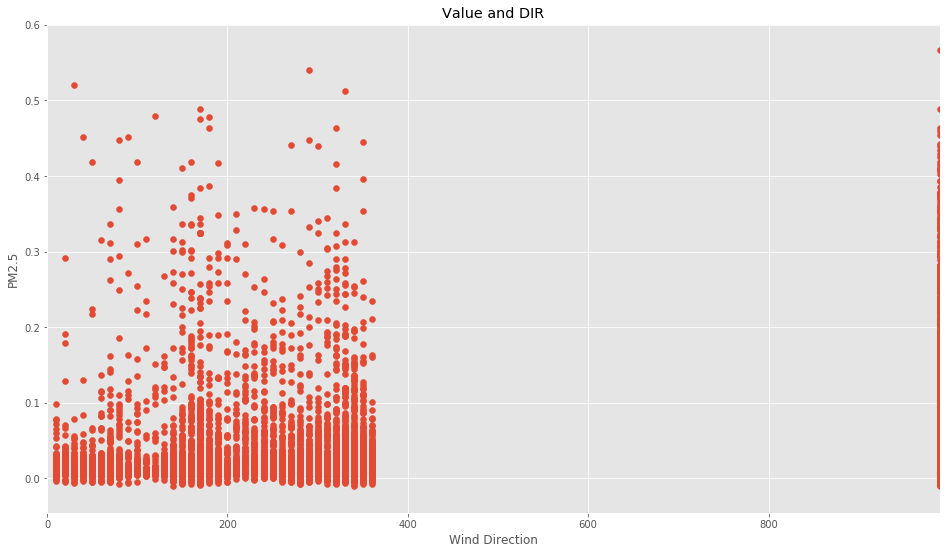

In [51]:
x = df.DIR
y = df.Value
plt.scatter(x,y)
plt.xlabel('Wind Direction')
plt.ylabel('PM2.5')
plt.title('Value and DIR')
plt.xlim(0, 990)
plt.show()

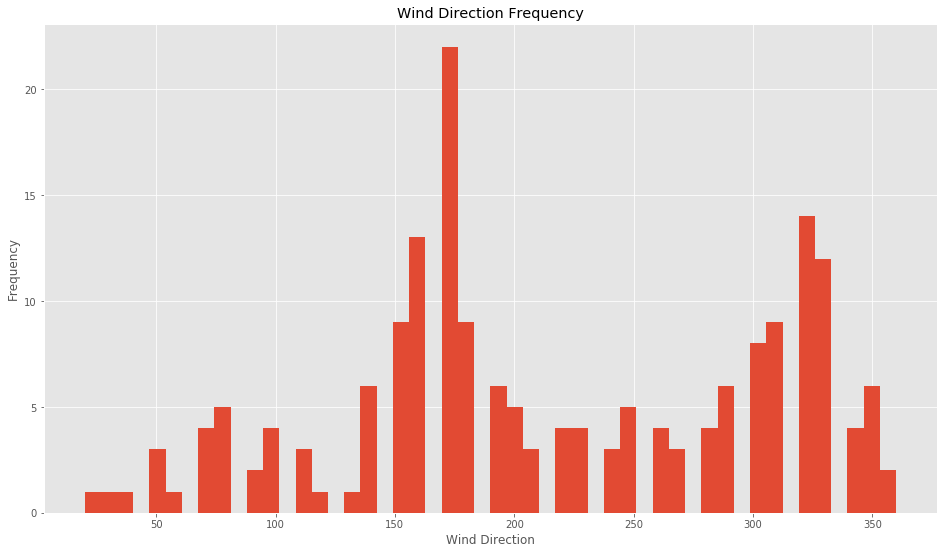

In [52]:
plt.hist(df.DIR[(df.DIR < 990) & (df.Value > .2)], 50)
plt.xlabel('Wind Direction')
plt.ylabel('Frequency')
plt.title('Wind Direction Frequency')
plt.show()

The value of 990 is the most varied direction in our dataset. Before we forward filled the data we only had about 5,000 990 DIR values, and now we have over 7,000. While this could be an issue, in the interest of preserving as much of the data as possible let's keep these rows for now. 

Direction is a particularly tricky feature because it is a circular feature. The field of circular statistics addresses these sorts of issues. However taking a more direct approach may be the best for a first try. In the feature engineering section we can handle these values by converting the DIR feature to a categorical variable using the cardinal directions. 

# Visualizing Cleaned Features

Make facet or subplot of PM2.5 levels by windspeed with one subplot per month. This will show if these lower measured values at low windspeeds are evenly distrbuted throughout the year or if they are mostly in certain months.

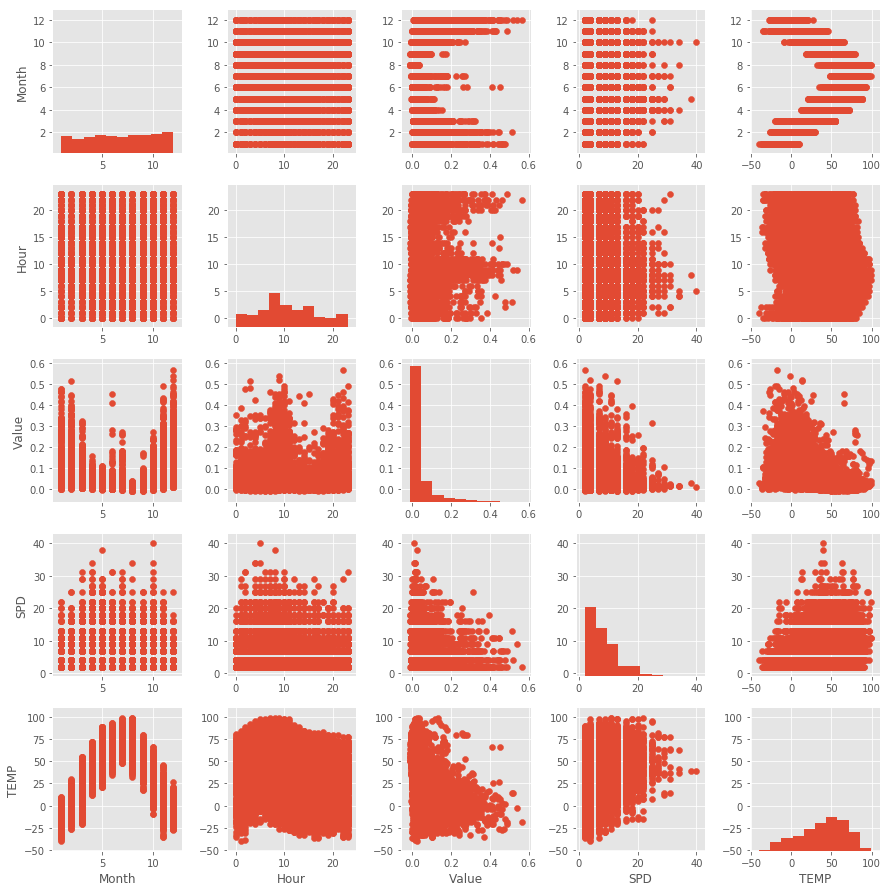

In [53]:
import seaborn as sns
g = sns.PairGrid(df, vars=["Month", "Hour", "Value", "SPD", "TEMP"], dropna=True)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

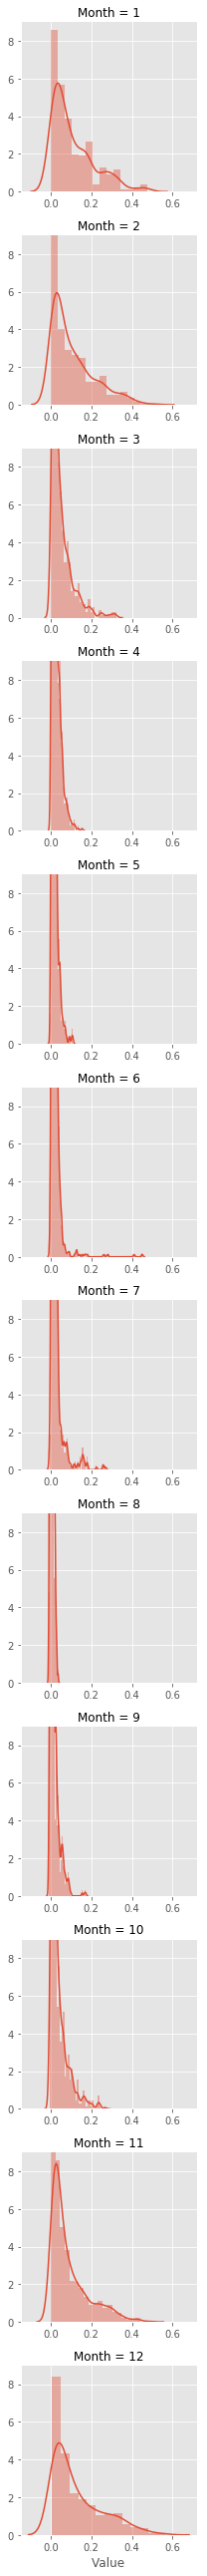

In [54]:
g = sns.FacetGrid(df, row='Month')
g.map(sns.distplot, "Value")
plt.show()

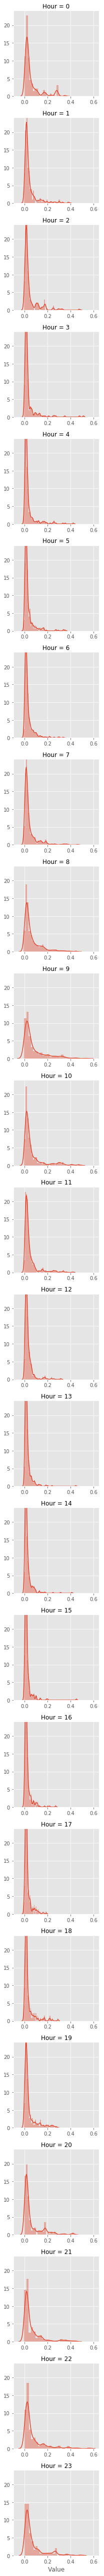

In [55]:
g = sns.FacetGrid(df, row='Hour')
g.map(sns.distplot, "Value")
plt.show()

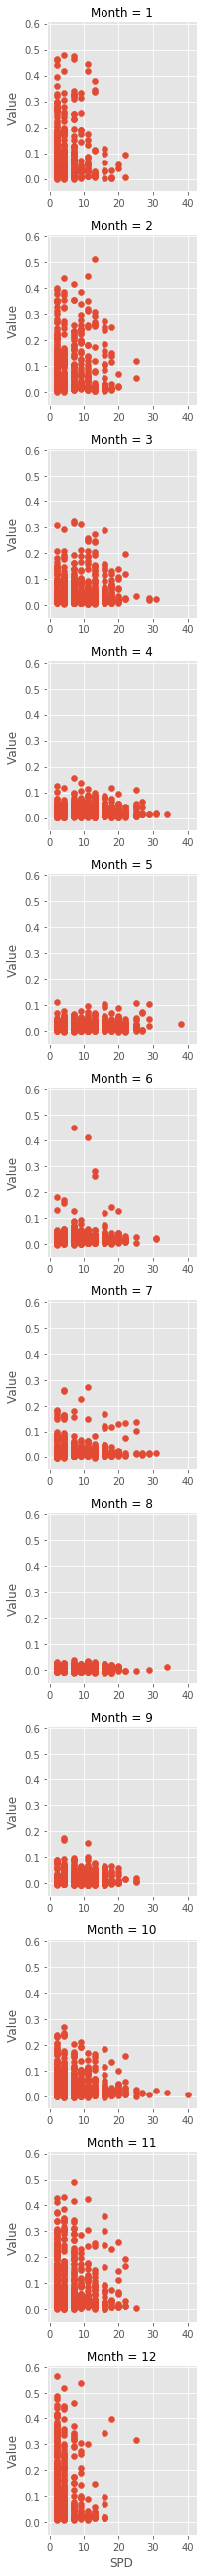

In [56]:
g = sns.FacetGrid(df, row='Month')
g.map(plt.scatter, "SPD","Value")
plt.show()


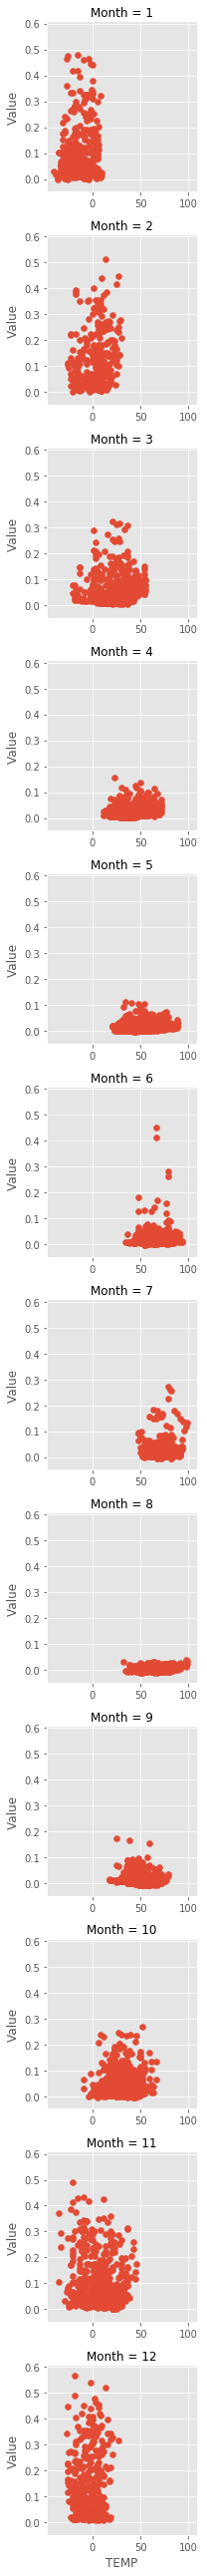

In [57]:
g = sns.FacetGrid(df, row='Month')
g.map(plt.scatter, "TEMP","Value")
plt.show()

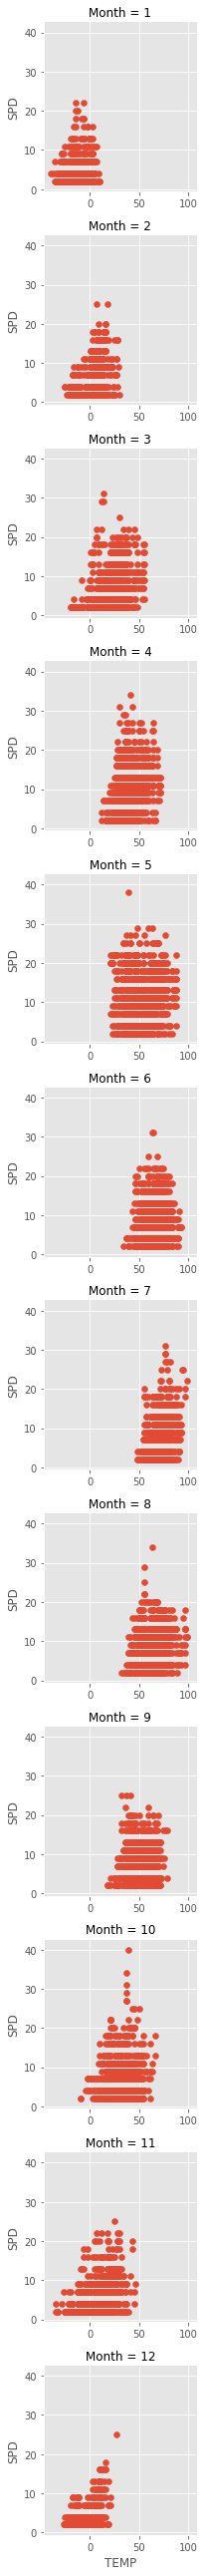

In [58]:
g = sns.FacetGrid(df, row='Month')
g.map(plt.scatter, "TEMP","SPD")
plt.show()

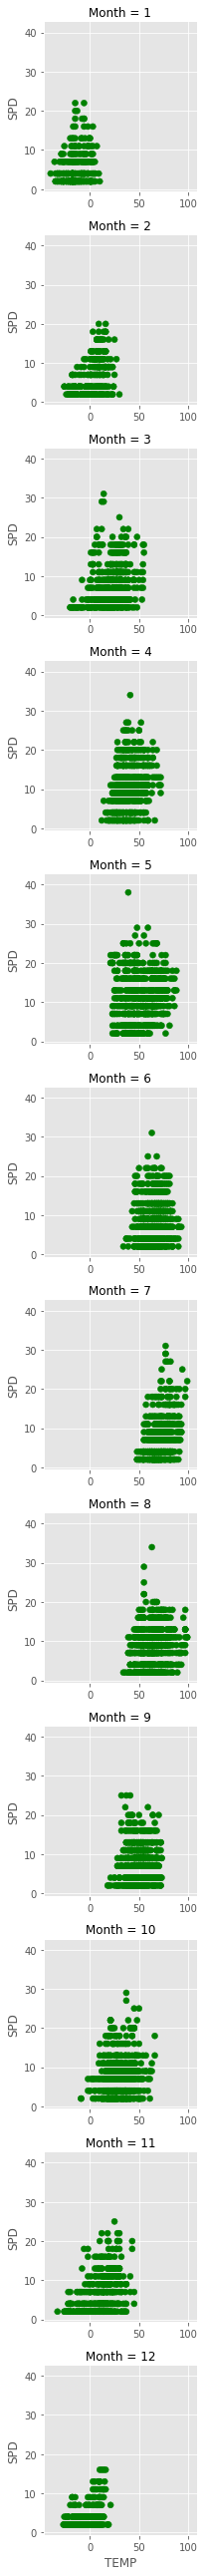

In [59]:
g = sns.FacetGrid(df, row='Month')
col = np.where(df['Value']<.1,'green',np.where(df['Value']>.1,'None','None'))
g.map(plt.scatter, "TEMP","SPD", color=col)
plt.show()

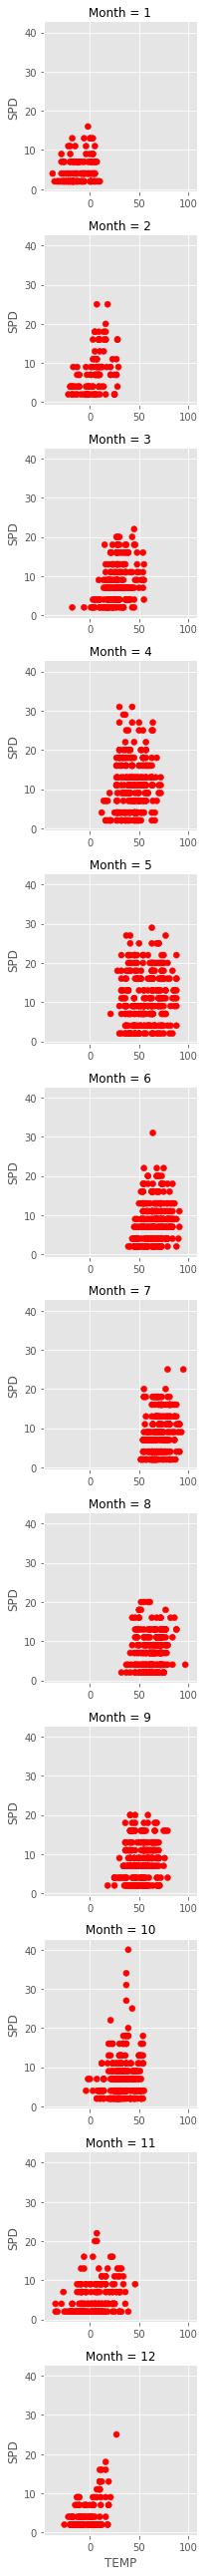

In [60]:
g = sns.FacetGrid(df, row='Month')
col = np.where(df['Value']<.1,'None',np.where(df['Value']>.1,'red','None'))
g.map(plt.scatter, "TEMP","SPD", color=col)
plt.show()

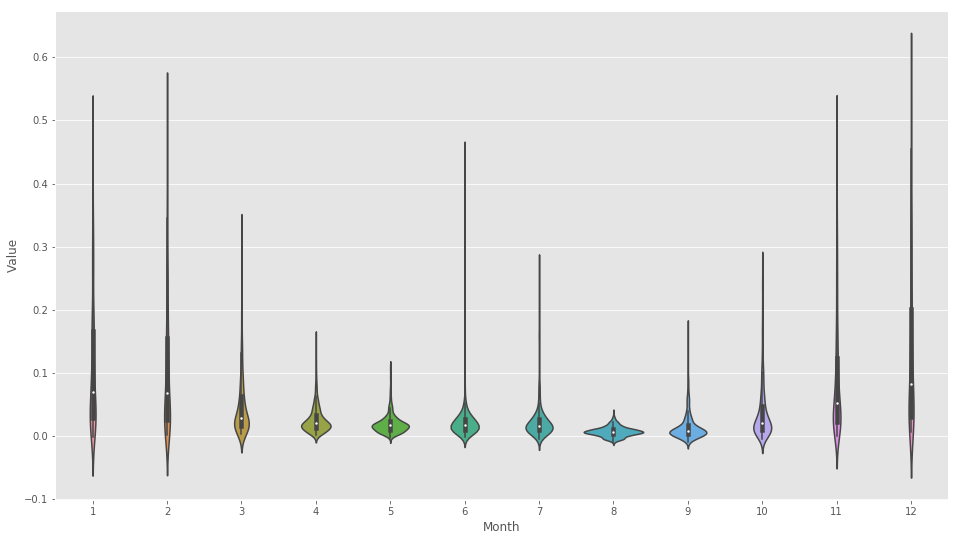

In [61]:
ax = sns.violinplot(x="Month", y="Value", data=df)

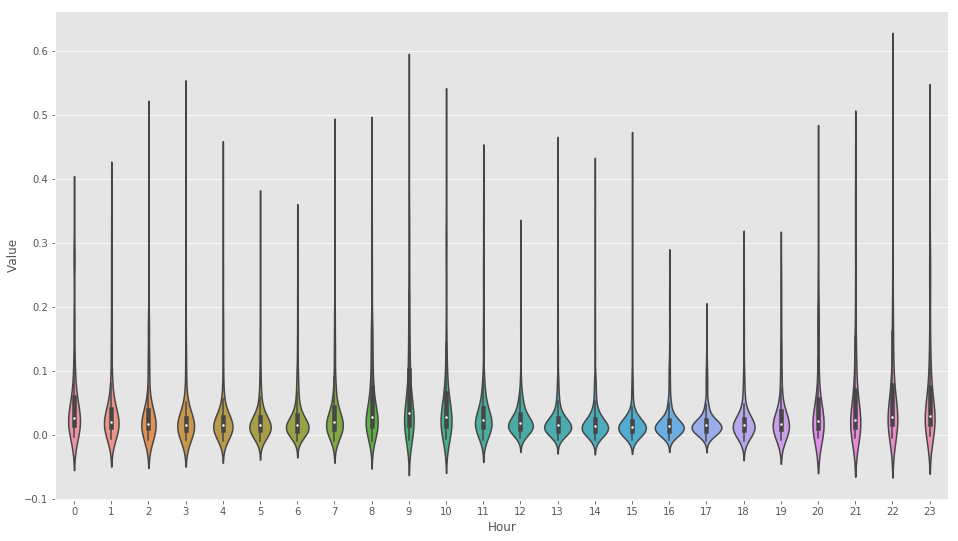

In [62]:
ax = sns.violinplot(x="Hour", y="Value", data=df)

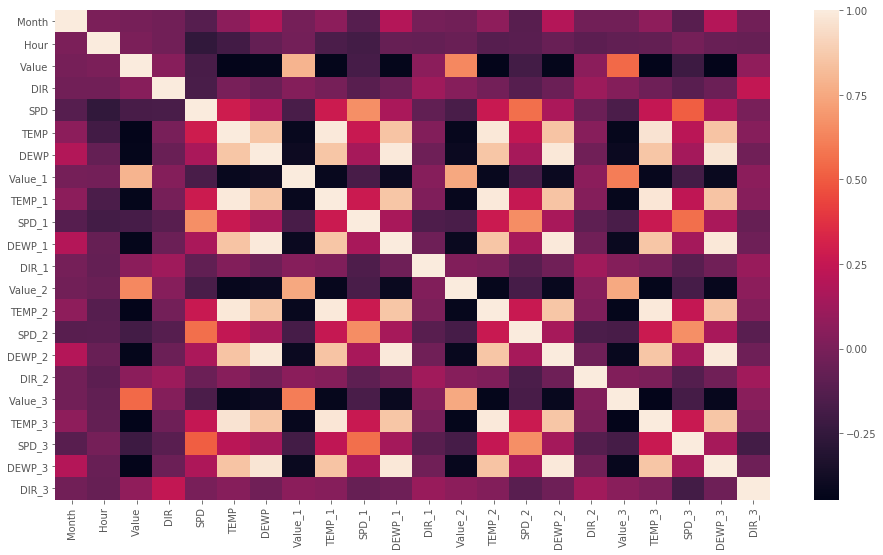

In [63]:
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [64]:
#g = sns.PairGrid(df, vars=["Month", "Hour", "Value", "DIR", "SPD", "TEMP"])
#g.map_upper(plt.scatter)
#g.map_lower(sns.kdeplot)
#g.map_diag(sns.kdeplot, lw=3, legend=False);

# Feature Engineering

## Convert Value Field from mg to µg
The US Embassy stores their PM2.5 values in mg/m^3. However when converting to the US EPA AQI standard the measurement used is µg/m^3. This is easy enough to convert by multiplying by 1,000. The purpose of this is to make it easy to display the results of the model and calculate AQI without any further computation.

In [65]:
# 1 mg = 1,000 µg
df['Value'] = df.Value * 1000
df['Value_1'] = df.Value_1 * 1000
df['Value_2'] = df.Value_2 * 1000
df['Value_3'] = df.Value_3 * 1000

In [66]:
df.head(10)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,Value_2,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3
0,2015-10-20 10:00:00,10,10,52.0,990.0,7.0,36.0,32.0,158.0,40.0,...,71.0,39.0,11.0,30.0,990.0,32.0,41.0,4.0,23.0,990.0
1,2015-10-20 11:00:00,10,11,39.0,990.0,2.0,34.0,30.0,52.0,36.0,...,158.0,40.0,16.0,29.0,990.0,71.0,39.0,11.0,30.0,990.0
2,2015-10-21 04:00:00,10,4,56.0,990.0,2.0,28.0,27.0,58.0,25.0,...,77.0,23.0,2.0,21.0,990.0,0.0,21.0,2.0,19.0,990.0
3,2015-10-21 05:00:00,10,5,68.0,990.0,2.0,37.0,27.0,56.0,28.0,...,58.0,25.0,4.0,23.0,80.0,77.0,23.0,2.0,21.0,990.0
4,2015-10-21 06:00:00,10,6,56.0,990.0,9.0,45.0,18.0,68.0,37.0,...,56.0,28.0,2.0,27.0,990.0,58.0,25.0,4.0,23.0,80.0
5,2015-10-21 07:00:00,10,7,63.0,240.0,13.0,46.0,16.0,56.0,45.0,...,68.0,37.0,2.0,27.0,990.0,56.0,28.0,2.0,27.0,990.0
6,2015-10-21 08:00:00,10,8,59.0,240.0,13.0,48.0,14.0,63.0,46.0,...,56.0,45.0,9.0,18.0,990.0,68.0,37.0,2.0,27.0,990.0
7,2015-10-21 09:00:00,10,9,57.0,240.0,13.0,46.0,14.0,59.0,48.0,...,63.0,46.0,13.0,16.0,240.0,56.0,45.0,9.0,18.0,990.0
8,2015-10-21 10:00:00,10,10,57.0,220.0,7.0,39.0,14.0,57.0,46.0,...,59.0,48.0,13.0,14.0,240.0,63.0,46.0,13.0,16.0,240.0
9,2015-10-21 11:00:00,10,11,63.0,160.0,9.0,34.0,14.0,57.0,39.0,...,57.0,46.0,13.0,14.0,240.0,59.0,48.0,13.0,14.0,240.0


## Create pollution classes

Our predicted feature (y) is currently a continuous feature. This is what is required for the regression algorithms. However we also would like to apply classification algorithms to our data. This will require us to modify our Value (y) feature.

Classification algorithms predict a category as an output instead of a continuous variable. This works quite well in the case of air pollution as the EPA has existing categories for classifying AQI. 

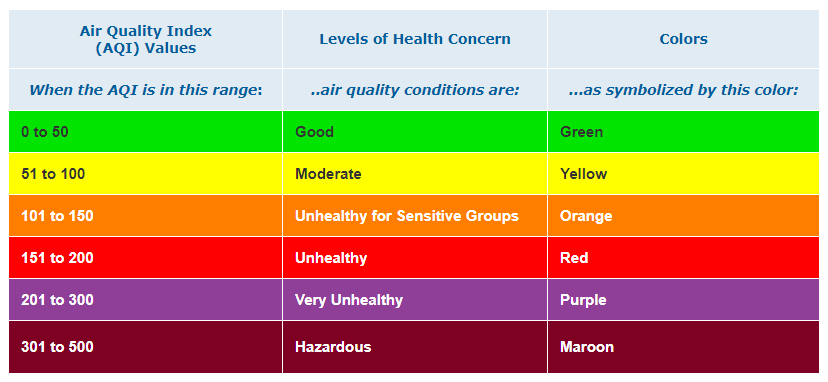

Source: https://airnow.gov/index.cfm?action=aqibasics.aqi

This is an easy to understand system for end users and also a good standard by which to base our classifier on. A few notes about the EPA AQI standard.

- The scale does not go above 500. As Ulaanbaatar PM2.5 pollution in fact does go above 500 regularly during winter months, we will need to handle this in some way.
- The PM2.5 measurement and AQI are different numbers. The measurement is placed against a scale that is used to identify the AQI in the chart above.
- AQI is a general scale that can combine multiple measures of air pollution. However in this case we will only be using PM2.5.

The divider between the the AQI categories is called the breakpoint (or the end of the bin in other words). The breakpoint scale is the measurement of PM2.5 in µg/m^3. The official breakpoints between the categories has changed over time. We will be using the official breakpoints from the EPA. One thing to note is these breakpoints are used to derive the AQI value. We will be using them to simply assign the AQI category.

| AQI Category | Low Breakpoint | High Breakpoint |
| :--------------: | :----------------: | :-----------------: |
| GOOD | 0 | 12 |
| MODERATE | 12.1 | 35.4 |
| UNHEALTHY FOR SENSITIVE | 35.5 | 55.4 |
| UNHEALTHY |55.5 | 150.4 |
| VERY UNHEALTHY | 150.5 | 250.4 |
| HAZARDOUS | 250.5 | 350.4 |
| HAZARDOUS | 350.5 | 500.4 |

Source: US EPA - https://aqs.epa.gov/aqsweb/documents/codetables/aqi_breakpoints.html

We will assign a value from 1-6 based on the AQI category above. For our purposes hazardous is hazardous, no need to apply a different category.

In [67]:
# For our purposes hazardous is hazardous, no need to apply a different category.
df['Value_cat'] = pd.cut(df['Value'],[-50,12,35.4,55.4,150.4,250.4,1000],labels=[1,2,3,4,5,6])

In [68]:
df.head(10)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3,Value_cat
0,2015-10-20 10:00:00,10,10,52.0,990.0,7.0,36.0,32.0,158.0,40.0,...,39.0,11.0,30.0,990.0,32.0,41.0,4.0,23.0,990.0,3
1,2015-10-20 11:00:00,10,11,39.0,990.0,2.0,34.0,30.0,52.0,36.0,...,40.0,16.0,29.0,990.0,71.0,39.0,11.0,30.0,990.0,3
2,2015-10-21 04:00:00,10,4,56.0,990.0,2.0,28.0,27.0,58.0,25.0,...,23.0,2.0,21.0,990.0,0.0,21.0,2.0,19.0,990.0,4
3,2015-10-21 05:00:00,10,5,68.0,990.0,2.0,37.0,27.0,56.0,28.0,...,25.0,4.0,23.0,80.0,77.0,23.0,2.0,21.0,990.0,4
4,2015-10-21 06:00:00,10,6,56.0,990.0,9.0,45.0,18.0,68.0,37.0,...,28.0,2.0,27.0,990.0,58.0,25.0,4.0,23.0,80.0,4
5,2015-10-21 07:00:00,10,7,63.0,240.0,13.0,46.0,16.0,56.0,45.0,...,37.0,2.0,27.0,990.0,56.0,28.0,2.0,27.0,990.0,4
6,2015-10-21 08:00:00,10,8,59.0,240.0,13.0,48.0,14.0,63.0,46.0,...,45.0,9.0,18.0,990.0,68.0,37.0,2.0,27.0,990.0,4
7,2015-10-21 09:00:00,10,9,57.0,240.0,13.0,46.0,14.0,59.0,48.0,...,46.0,13.0,16.0,240.0,56.0,45.0,9.0,18.0,990.0,4
8,2015-10-21 10:00:00,10,10,57.0,220.0,7.0,39.0,14.0,57.0,46.0,...,48.0,13.0,14.0,240.0,63.0,46.0,13.0,16.0,240.0,4
9,2015-10-21 11:00:00,10,11,63.0,160.0,9.0,34.0,14.0,57.0,39.0,...,46.0,13.0,14.0,240.0,59.0,48.0,13.0,14.0,240.0,4


## Convert cyclical & circular features



### DIR
Previously we found that more than half our data set contains 990 values in the DIR column. We won't be able to convert this feature to a circular feature (0-360 degrees) given these values. Alternatively let's change this feature to a categorical one. We can split the data set equally into cardinal directions as so:

Source: http://snowfence.umn.edu/Components/winddirectionanddegreeswithouttable3.htm

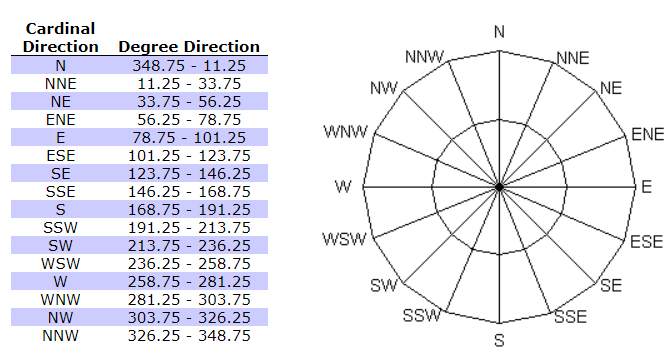

For the 990 values we can simply assign them the value "V" for variable. Let's implement this

In [69]:
pd.unique(df.DIR)

array([ 990.,  240.,  220.,  160.,  250.,  290.,  330.,  340.,  320.,
        180.,  130.,  140.,   30.,   40.,  150.,  200.,  190.,  360.,
         50.,  280.,  170.,  310.,  300.,  270.,  120.,  350.,   70.,
         90.,   60.,  100.,  210.,   80.,  260.,   10.,  230.,   20.,  110.])

### Convert DIR using SIN COS method

In [70]:
#df['DIR_sin'] = np.sin(df.DIR*(2.*np.pi/360))
#df['DIR_cos'] = np.cos(df.DIR*(2.*np.pi/360))
#df['DIR_1_sin'] = np.sin(df.DIR_1*(2.*np.pi/360))
#df['DIR_1_cos'] = np.cos(df.DIR_1*(2.*np.pi/360))
#df['DIR_2_sin'] = np.sin(df.DIR_2*(2.*np.pi/360))
#df['DIR_2_cos'] = np.cos(df.DIR_2*(2.*np.pi/360))
#df['DIR_3_sin'] = np.sin(df.DIR_3*(2.*np.pi/360))
#df['DIR_3_cos'] = np.cos(df.DIR_3*(2.*np.pi/360))

In [71]:
df.head(20)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3,Value_cat
0,2015-10-20 10:00:00,10,10,52.0,990.0,7.0,36.0,32.0,158.0,40.0,...,39.0,11.0,30.0,990.0,32.0,41.0,4.0,23.0,990.0,3
1,2015-10-20 11:00:00,10,11,39.0,990.0,2.0,34.0,30.0,52.0,36.0,...,40.0,16.0,29.0,990.0,71.0,39.0,11.0,30.0,990.0,3
2,2015-10-21 04:00:00,10,4,56.0,990.0,2.0,28.0,27.0,58.0,25.0,...,23.0,2.0,21.0,990.0,0.0,21.0,2.0,19.0,990.0,4
3,2015-10-21 05:00:00,10,5,68.0,990.0,2.0,37.0,27.0,56.0,28.0,...,25.0,4.0,23.0,80.0,77.0,23.0,2.0,21.0,990.0,4
4,2015-10-21 06:00:00,10,6,56.0,990.0,9.0,45.0,18.0,68.0,37.0,...,28.0,2.0,27.0,990.0,58.0,25.0,4.0,23.0,80.0,4
5,2015-10-21 07:00:00,10,7,63.0,240.0,13.0,46.0,16.0,56.0,45.0,...,37.0,2.0,27.0,990.0,56.0,28.0,2.0,27.0,990.0,4
6,2015-10-21 08:00:00,10,8,59.0,240.0,13.0,48.0,14.0,63.0,46.0,...,45.0,9.0,18.0,990.0,68.0,37.0,2.0,27.0,990.0,4
7,2015-10-21 09:00:00,10,9,57.0,240.0,13.0,46.0,14.0,59.0,48.0,...,46.0,13.0,16.0,240.0,56.0,45.0,9.0,18.0,990.0,4
8,2015-10-21 10:00:00,10,10,57.0,220.0,7.0,39.0,14.0,57.0,46.0,...,48.0,13.0,14.0,240.0,63.0,46.0,13.0,16.0,240.0,4
9,2015-10-21 11:00:00,10,11,63.0,160.0,9.0,34.0,14.0,57.0,39.0,...,46.0,13.0,14.0,240.0,59.0,48.0,13.0,14.0,240.0,4


In [72]:
#df['DIR_cos'] = df.DIR_cos.replace(np.cos(990*(2*np.pi/360)), 0)
#df['DIR_1_cos'] = df.DIR_1_cos.replace(np.cos(990*(2*np.pi/360)), 0)
#df['DIR_2_cos'] = df.DIR_2_cos.replace(np.cos(990*(2*np.pi/360)), 0)
#df['DIR_3_cos'] = df.DIR_3_cos.replace(np.cos(990*(2*np.pi/360)), 0)

In [73]:
#df['DIR_sin'][(df.DIR_sin == -1) & (df.DIR == 990)] = 0
#df['DIR_1_sin'][(df.DIR_1_sin == -1) & (df.DIR_1 == 990)] = 0
#df['DIR_2_sin'][(df.DIR_2_sin == -1) & (df.DIR_2 == 990)] = 0
#df['DIR_3_sin'][(df.DIR_3_sin == -1) & (df.DIR_3 == 990)] = 0

In [74]:
#df.plot.scatter('DIR_sin','DIR_cos').set_aspect('equal')
#plt.show()

In [75]:
#df = df.drop(['DIR', 'DIR_1', 'DIR_2', 'DIR_3'], axis=1)

In [76]:
#df.head(10)

In [77]:
df.columns

Index(['Date', 'Month', 'Hour', 'Value', 'DIR', 'SPD', 'TEMP', 'DEWP',
       'Value_1', 'TEMP_1', 'SPD_1', 'DEWP_1', 'DIR_1', 'Value_2', 'TEMP_2',
       'SPD_2', 'DEWP_2', 'DIR_2', 'Value_3', 'TEMP_3', 'SPD_3', 'DEWP_3',
       'DIR_3', 'Value_cat'],
      dtype='object')

### Hour and Month - Convert cyclical feature

Hour runs from 0-24 and Month runs from 0-12. A machine learning algorithm would not properly identify that hour 0 and 24 are next to each other. It also would not identify that month 0 and 12 are next to each other. In order to provide a better signal we can convert these features. 

The code and math behind this method comes from David Kaleko's blog on handling cyclical features. Similar methods have been found in other places but this is a great straightforward explanation showing the impact on model performance.
Link: http://blog.davidkaleko.com/feature-engineering-cyclical-features.html

In [78]:
#df['hr_sin'] = np.sin(df.Hour*(2.*np.pi/24))
#df['hr_cos'] = np.cos(df.Hour*(2.*np.pi/24))
#df['month_sin'] = np.sin((df.Month-1)*(2.*np.pi/12))
#df['month_cos'] = np.cos((df.Month-1)*(2.*np.pi/12))

Visualizing the features we created we can see they are now circular instead of linear. 

In [79]:
#df.plot.scatter('hr_sin','hr_cos').set_aspect('equal')
#df.plot.scatter('month_sin','month_cos').set_aspect('equal')
#plt.show()

We no longer need the Month and Hour columns so we can safely drop them.

In [80]:
#df = df.drop(['Month', 'Hour'], axis=1)

In [81]:
df.head(5)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3,Value_cat
0,2015-10-20 10:00:00,10,10,52.0,990.0,7.0,36.0,32.0,158.0,40.0,...,39.0,11.0,30.0,990.0,32.0,41.0,4.0,23.0,990.0,3
1,2015-10-20 11:00:00,10,11,39.0,990.0,2.0,34.0,30.0,52.0,36.0,...,40.0,16.0,29.0,990.0,71.0,39.0,11.0,30.0,990.0,3
2,2015-10-21 04:00:00,10,4,56.0,990.0,2.0,28.0,27.0,58.0,25.0,...,23.0,2.0,21.0,990.0,0.0,21.0,2.0,19.0,990.0,4
3,2015-10-21 05:00:00,10,5,68.0,990.0,2.0,37.0,27.0,56.0,28.0,...,25.0,4.0,23.0,80.0,77.0,23.0,2.0,21.0,990.0,4
4,2015-10-21 06:00:00,10,6,56.0,990.0,9.0,45.0,18.0,68.0,37.0,...,28.0,2.0,27.0,990.0,58.0,25.0,4.0,23.0,80.0,4


## Convert TEMP and DEWP from F to C

The source of the weather data comes from NOAA, which stores temperatures and dew points in Fahrenheit. As our end user is more familiar with Celsius we will convert these features now to eliminate the need to when displaying to the user.

In [82]:
# Formula to convert F to C is: [°C] = ([°F] - 32) × 5/9
df['TEMP'] = (df.TEMP - 32) * 5.0/9.0
df['TEMP_1'] = (df.TEMP_1 - 32) * 5.0/9.0
df['TEMP_2'] = (df.TEMP_2 - 32) * 5.0/9.0
df['TEMP_3'] = (df.TEMP_3 - 32) * 5.0/9.0

In [83]:
# Formula to convert F to C is: [°C] = ([°F] - 32) × 5/9
df['DEWP'] = (df.DEWP - 32) * 5.0/9.0
df['DEWP_1'] = (df.DEWP_1 - 32) * 5.0/9.0
df['DEWP_2'] = (df.DEWP_2 - 32) * 5.0/9.0
df['DEWP_3'] = (df.DEWP_3 - 32) * 5.0/9.0

In [84]:
df.head(5)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3,Value_cat
0,2015-10-20 10:00:00,10,10,52.0,990.0,7.0,2.222222,0.000000,158.0,4.444444,...,3.888889,11.0,-1.111111,990.0,32.0,5.000000,4.0,-5.000000,990.0,3
1,2015-10-20 11:00:00,10,11,39.0,990.0,2.0,1.111111,-1.111111,52.0,2.222222,...,4.444444,16.0,-1.666667,990.0,71.0,3.888889,11.0,-1.111111,990.0,3
2,2015-10-21 04:00:00,10,4,56.0,990.0,2.0,-2.222222,-2.777778,58.0,-3.888889,...,-5.000000,2.0,-6.111111,990.0,0.0,-6.111111,2.0,-7.222222,990.0,4
3,2015-10-21 05:00:00,10,5,68.0,990.0,2.0,2.777778,-2.777778,56.0,-2.222222,...,-3.888889,4.0,-5.000000,80.0,77.0,-5.000000,2.0,-6.111111,990.0,4
4,2015-10-21 06:00:00,10,6,56.0,990.0,9.0,7.222222,-7.777778,68.0,2.777778,...,-2.222222,2.0,-2.777778,990.0,58.0,-3.888889,4.0,-5.000000,80.0,4


In [85]:
#df['HUM'] = 100-5*(df.TEMP-df.DEWP)
#df['HUM_1'] = 100-5*(df.TEMP_1-df.DEWP_1)
#df['HUM_2'] = 100-5*(df.TEMP_2-df.DEWP_2)
#df['HUM_3'] = 100-5*(df.TEMP_3-df.DEWP_)

In [86]:
#df = df.drop(['DEWP','DEWP_1','DEWP_2','DEWP_3'], axis=1)

In [87]:
#df.head(10)

## Convert SPD from Mph to Kph

In [88]:
# 1 mph = 1.60934 kph
df['SPD'] = df.SPD * 1.60934
df['SPD_1'] = df.SPD_1 * 1.60934
df['SPD_2'] = df.SPD_2 * 1.60934
df['SPD_3'] = df.SPD_3 * 1.60934

In [89]:
df.head(5)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,TEMP_2,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3,Value_cat
0,2015-10-20 10:00:00,10,10,52.0,990.0,11.26538,2.222222,0.000000,158.0,4.444444,...,3.888889,17.70274,-1.111111,990.0,32.0,5.000000,6.43736,-5.000000,990.0,3
1,2015-10-20 11:00:00,10,11,39.0,990.0,3.21868,1.111111,-1.111111,52.0,2.222222,...,4.444444,25.74944,-1.666667,990.0,71.0,3.888889,17.70274,-1.111111,990.0,3
2,2015-10-21 04:00:00,10,4,56.0,990.0,3.21868,-2.222222,-2.777778,58.0,-3.888889,...,-5.000000,3.21868,-6.111111,990.0,0.0,-6.111111,3.21868,-7.222222,990.0,4
3,2015-10-21 05:00:00,10,5,68.0,990.0,3.21868,2.777778,-2.777778,56.0,-2.222222,...,-3.888889,6.43736,-5.000000,80.0,77.0,-5.000000,3.21868,-6.111111,990.0,4
4,2015-10-21 06:00:00,10,6,56.0,990.0,14.48406,7.222222,-7.777778,68.0,2.777778,...,-2.222222,3.21868,-2.777778,990.0,58.0,-3.888889,6.43736,-5.000000,80.0,4


## Create day of the week feature

In [90]:
import datetime as dt

df['day_week'] = df['Date'].dt.weekday_name

In [91]:
df.head()

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3,Value_cat,day_week
0,2015-10-20 10:00:00,10,10,52.0,990.0,11.26538,2.222222,0.000000,158.0,4.444444,...,17.70274,-1.111111,990.0,32.0,5.000000,6.43736,-5.000000,990.0,3,Tuesday
1,2015-10-20 11:00:00,10,11,39.0,990.0,3.21868,1.111111,-1.111111,52.0,2.222222,...,25.74944,-1.666667,990.0,71.0,3.888889,17.70274,-1.111111,990.0,3,Tuesday
2,2015-10-21 04:00:00,10,4,56.0,990.0,3.21868,-2.222222,-2.777778,58.0,-3.888889,...,3.21868,-6.111111,990.0,0.0,-6.111111,3.21868,-7.222222,990.0,4,Wednesday
3,2015-10-21 05:00:00,10,5,68.0,990.0,3.21868,2.777778,-2.777778,56.0,-2.222222,...,6.43736,-5.000000,80.0,77.0,-5.000000,3.21868,-6.111111,990.0,4,Wednesday
4,2015-10-21 06:00:00,10,6,56.0,990.0,14.48406,7.222222,-7.777778,68.0,2.777778,...,3.21868,-2.777778,990.0,58.0,-3.888889,6.43736,-5.000000,80.0,4,Wednesday


In [92]:
df['day_week_cat'] = df.day_week.astype("category").cat.codes

In [93]:
df.dtypes

Date            datetime64[ns]
Month                    int64
Hour                     int64
Value                  float64
DIR                    float64
SPD                    float64
TEMP                   float64
DEWP                   float64
Value_1                float64
TEMP_1                 float64
SPD_1                  float64
DEWP_1                 float64
DIR_1                  float64
Value_2                float64
TEMP_2                 float64
SPD_2                  float64
DEWP_2                 float64
DIR_2                  float64
Value_3                float64
TEMP_3                 float64
SPD_3                  float64
DEWP_3                 float64
DIR_3                  float64
Value_cat             category
day_week                object
day_week_cat              int8
dtype: object

In [94]:
load = df[['Value', 'day_week']].groupby(['day_week']).mean()

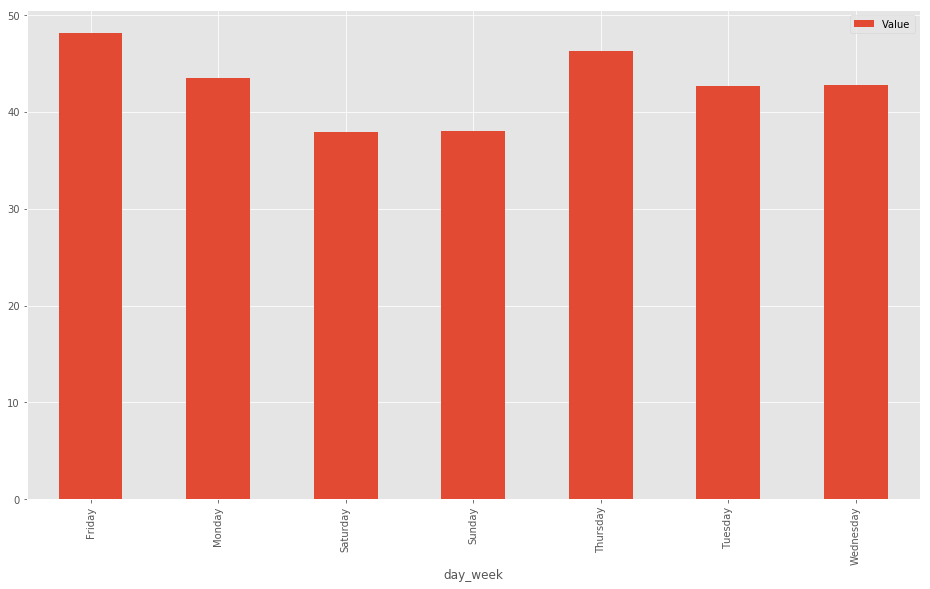

In [95]:
load.plot(kind='bar')

In [96]:
df = df.drop(labels='day_week', axis=1)

## More Exploration

In [97]:
df.head()

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3,Value_cat,day_week_cat
0,2015-10-20 10:00:00,10,10,52.0,990.0,11.26538,2.222222,0.000000,158.0,4.444444,...,17.70274,-1.111111,990.0,32.0,5.000000,6.43736,-5.000000,990.0,3,5
1,2015-10-20 11:00:00,10,11,39.0,990.0,3.21868,1.111111,-1.111111,52.0,2.222222,...,25.74944,-1.666667,990.0,71.0,3.888889,17.70274,-1.111111,990.0,3,5
2,2015-10-21 04:00:00,10,4,56.0,990.0,3.21868,-2.222222,-2.777778,58.0,-3.888889,...,3.21868,-6.111111,990.0,0.0,-6.111111,3.21868,-7.222222,990.0,4,6
3,2015-10-21 05:00:00,10,5,68.0,990.0,3.21868,2.777778,-2.777778,56.0,-2.222222,...,6.43736,-5.000000,80.0,77.0,-5.000000,3.21868,-6.111111,990.0,4,6
4,2015-10-21 06:00:00,10,6,56.0,990.0,14.48406,7.222222,-7.777778,68.0,2.777778,...,3.21868,-2.777778,990.0,58.0,-3.888889,6.43736,-5.000000,80.0,4,6


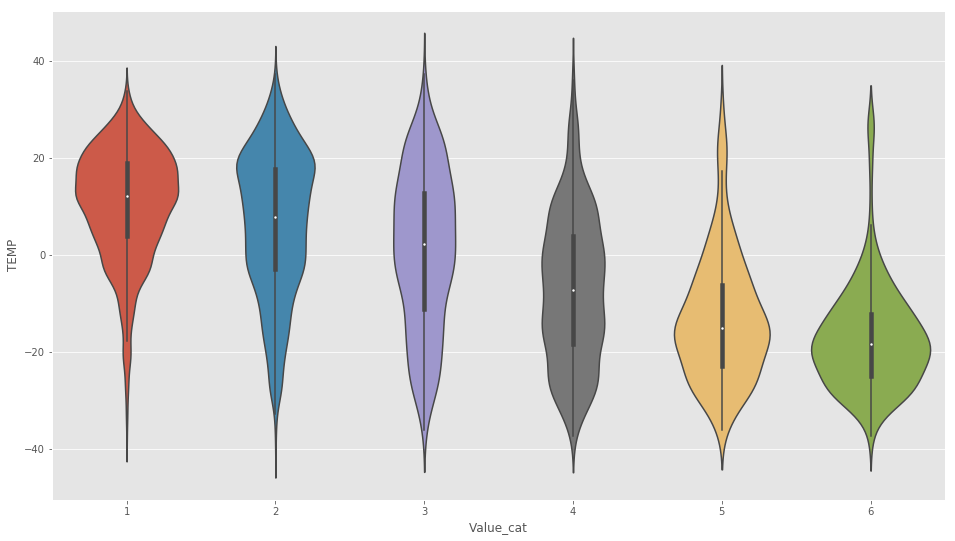

In [98]:
ax = sns.violinplot(x="Value_cat", y="TEMP", data=df)

### Get final dataset

Before we move to the training and evaluating the model we can finalize our dataframe. The only unneeded feature we have remaining is the Date feature. 

In [99]:
df.head(5)

,Date,Month,Hour,Value,DIR,SPD,TEMP,DEWP,Value_1,TEMP_1,...,SPD_2,DEWP_2,DIR_2,Value_3,TEMP_3,SPD_3,DEWP_3,DIR_3,Value_cat,day_week_cat
0,2015-10-20 10:00:00,10,10,52.0,990.0,11.26538,2.222222,0.000000,158.0,4.444444,...,17.70274,-1.111111,990.0,32.0,5.000000,6.43736,-5.000000,990.0,3,5
1,2015-10-20 11:00:00,10,11,39.0,990.0,3.21868,1.111111,-1.111111,52.0,2.222222,...,25.74944,-1.666667,990.0,71.0,3.888889,17.70274,-1.111111,990.0,3,5
2,2015-10-21 04:00:00,10,4,56.0,990.0,3.21868,-2.222222,-2.777778,58.0,-3.888889,...,3.21868,-6.111111,990.0,0.0,-6.111111,3.21868,-7.222222,990.0,4,6
3,2015-10-21 05:00:00,10,5,68.0,990.0,3.21868,2.777778,-2.777778,56.0,-2.222222,...,6.43736,-5.000000,80.0,77.0,-5.000000,3.21868,-6.111111,990.0,4,6
4,2015-10-21 06:00:00,10,6,56.0,990.0,14.48406,7.222222,-7.777778,68.0,2.777778,...,3.21868,-2.777778,990.0,58.0,-3.888889,6.43736,-5.000000,80.0,4,6


In [100]:
df = df.drop(['Date', 'Value'], axis=1)
df.columns

Index(['Month', 'Hour', 'DIR', 'SPD', 'TEMP', 'DEWP', 'Value_1', 'TEMP_1',
       'SPD_1', 'DEWP_1', 'DIR_1', 'Value_2', 'TEMP_2', 'SPD_2', 'DEWP_2',
       'DIR_2', 'Value_3', 'TEMP_3', 'SPD_3', 'DEWP_3', 'DIR_3', 'Value_cat',
       'day_week_cat'],
      dtype='object')

In [101]:
df.to_csv('weather-and-aqi-cleaned-v1.csv')

In [102]:
df.dtypes

Month              int64
Hour               int64
DIR              float64
SPD              float64
TEMP             float64
DEWP             float64
Value_1          float64
TEMP_1           float64
SPD_1            float64
DEWP_1           float64
DIR_1            float64
Value_2          float64
TEMP_2           float64
SPD_2            float64
DEWP_2           float64
DIR_2            float64
Value_3          float64
TEMP_3           float64
SPD_3            float64
DEWP_3           float64
DIR_3            float64
Value_cat       category
day_week_cat        int8
dtype: object

# Split into Training and Test Data

Cross validation is always desired when training machine learning models to be able to trust the generality of the model created. We will split our data into training and test data using Scikit learn's built in tools. Also for scikit learn we need to separate our dataset into inputs and the feature being predicted (or X's and y's).

In [103]:
y = df['Value_cat']

In [104]:
X = df.drop(['Value_cat'], axis=1)

In [105]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=1234)

In [106]:
X_train.shape, y_train.shape

((5992, 22), (5992,))

In [107]:
X_test.shape, y_test.shape

((2568, 22), (2568,))

## Implement SMOTE

In [108]:
#from imblearn.over_sampling import SMOTE

#oversampler=SMOTE(random_state=1234, ratio = 1.0, k_neighbors=3)
#os_X,os_y=oversampler.fit_sample(np.asarray(X_train),np.asarray(y_train))

In [109]:
# verify new data set is balanced
#len(os_y[os_y==1])

# Implement ML Algorithms

There are many algorithms to choose from in scikit learn. However the goal of this project is to implement the final model in Azure ML. This gives us a subset of options to work with. We will first implement these algorithms using scikit learn for illustration purposes and then implement the best few in Azure ML for creating the final web service. 

Algorithms to test:

**Classification**
- Multiclass neural network
- Multiclass logistic regression
- Random Forest
- Decision Tree

### Multiclass neural network

In [110]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Create MLPClassifier object
mlp = MLPClassifier(activation='logistic', random_state=1234)

In [111]:
# Train the model using the training sets
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1234,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [112]:
# Score the model
multiclass_neural_network_score = mlp.score(X_test, y_test)
multiclass_neural_network_score

0.68341121495327106

In [113]:
# Make predictions using the testing set
mnn_pred = mlp.predict(X_test)

In [114]:
# Calculate probabilities
mnn_prob = mlp.predict_proba(X_test)

In [115]:
# Calculate confusion matrix
confusion_mnn = confusion_matrix(y_test,mnn_pred)

In [116]:
confusion_mnn

array([[580, 208,   0,   2,   0,   1],
       [ 82, 896,  11,  48,   5,   0],
       [  5, 150,   8,  65,   1,   0],
       [  3,  79,   8, 210,  16,  20],
       [  0,   4,   2,  51,  25,  22],
       [  0,   2,   0,  14,  14,  36]], dtype=int64)

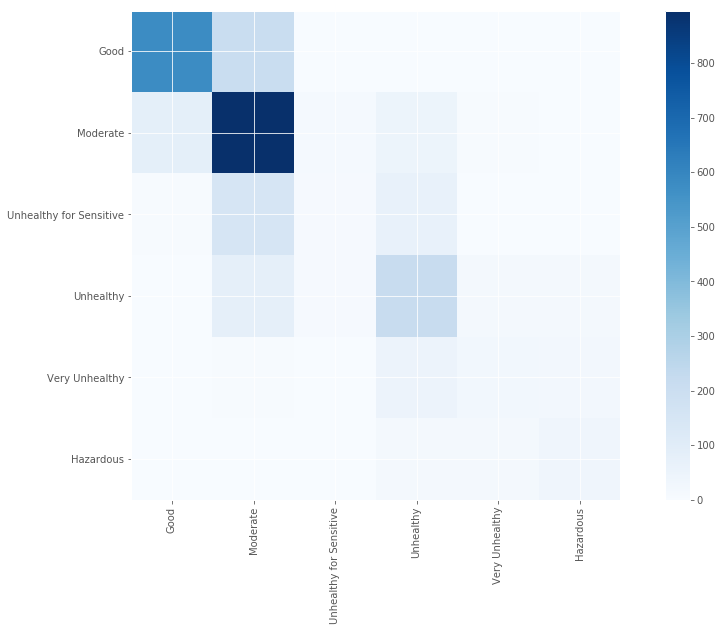

In [117]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_mnn, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

In [118]:
print(classification_report(y_test, mnn_pred))

             precision    recall  f1-score   support

          1       0.87      0.73      0.79       791
          2       0.67      0.86      0.75      1042
          3       0.28      0.03      0.06       229
          4       0.54      0.62      0.58       336
          5       0.41      0.24      0.30       104
          6       0.46      0.55      0.50        66

avg / total       0.66      0.68      0.66      2568



In [119]:
y_test

7509    1
5832    1
8221    3
3865    1
3190    1
6487    2
2641    2
3163    1
4156    6
3351    1
8255    4
4309    5
2615    3
2407    2
1621    2
6407    2
6189    1
3542    3
2510    2
2069    3
2328    1
6746    1
788     6
5366    1
3162    1
3221    1
5393    1
2213    2
5611    1
4903    2
       ..
4673    5
5198    4
6983    1
6862    1
112     5
3855    1
1510    2
4096    4
1703    2
6721    2
432     4
418     5
2500    2
4932    4
761     5
4180    4
4002    4
682     6
4969    2
5985    1
3972    1
8067    1
1215    2
4628    4
5004    4
6878    1
3341    1
6082    1
8269    2
5993    1
Name: Value_cat, Length: 2568, dtype: category
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

### Multiclass logistic regression

In [120]:
from sklearn.linear_model import LogisticRegression

# Create logistic regression object
log_regr = LogisticRegression()

In [121]:
# Train the model using the training sets
log_regr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [122]:
# Score the model
logistic_regression_score = log_regr.score(X_test, y_test)
logistic_regression_score

0.63084112149532712

In [123]:
# Make predictions using the testing set
log_regr_pred = log_regr.predict(X_test)

In [124]:
# Calculate probabilities
log_regr_prob = log_regr.predict_proba(X_test)

In [125]:
# Calculate confusion matrix
confusion_log_regr = confusion_matrix(y_test, log_regr_pred)

In [126]:
confusion_log_regr

array([[664, 124,   2,   0,   0,   1],
       [204, 820,   0,  17,   0,   1],
       [  9, 196,   0,  23,   0,   1],
       [  6, 213,   0, 103,   0,  14],
       [  0,  25,   0,  66,   1,  12],
       [  0,   5,   0,  28,   1,  32]], dtype=int64)

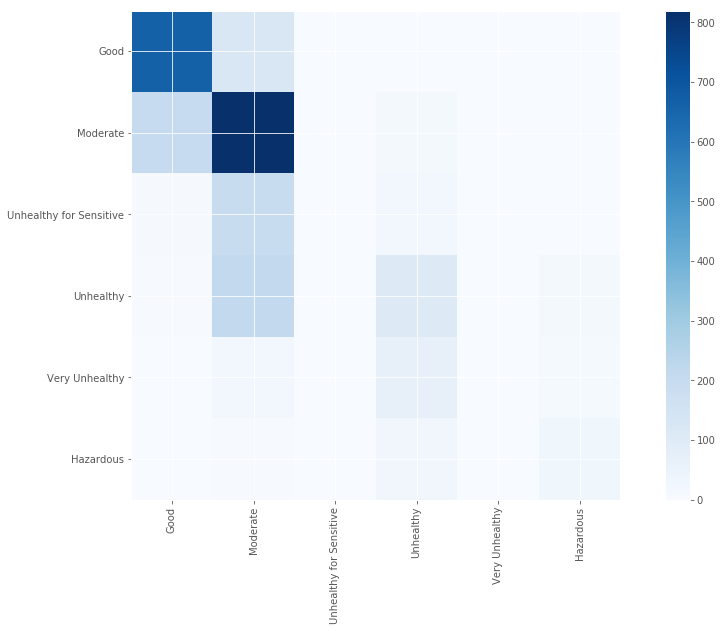

In [127]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_log_regr, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

### Random forest

In [128]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Create Random Forest Regressor object
rf = RandomForestClassifier()

In [129]:
# Train the model using the training sets
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [130]:
# Score the model
rf_score = rf.score(X_test, y_test)
rf_score

0.68263239875389403

In [131]:
# Make predictions using the testing set
rf_pred = rf.predict(X_test)

In [132]:
# Calculate confusion matrix
confusion_rf = confusion_matrix(y_test, rf_pred)

In [133]:
confusion_rf

array([[670, 115,   1,   5,   0,   0],
       [156, 802,  50,  32,   1,   1],
       [  9, 136,  38,  44,   2,   0],
       [  5,  78,  43, 183,  18,   9],
       [  0,   8,   5,  53,  28,  10],
       [  0,   2,   1,  21,  10,  32]], dtype=int64)

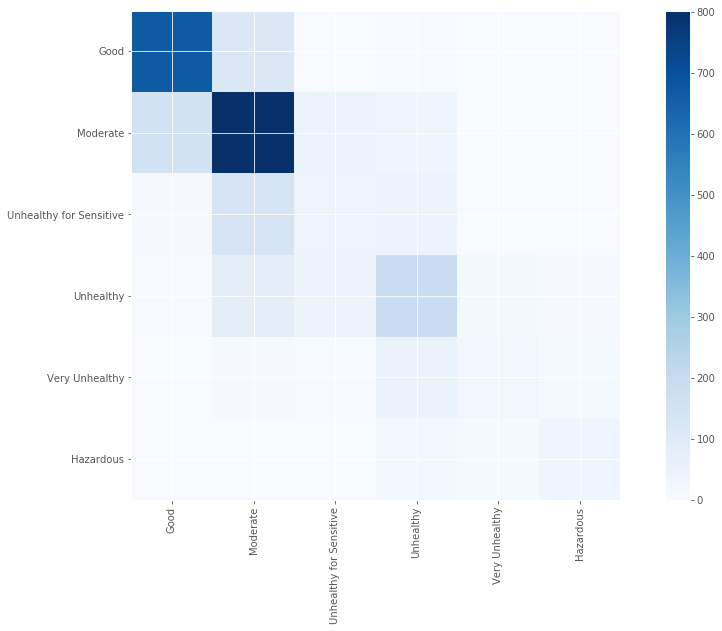

In [134]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_rf, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

### Decision Tree

In [135]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [136]:
# Create decision tree object with adaboost

tree = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=300, learning_rate=.1)

In [137]:
# Train the model using the training sets
tree.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=0.1, n_estimators=300, random_state=None)

In [138]:
# Score the decision tree model
tree_score = tree.score(X_test, y_test)
tree_score

0.5930685358255452

In [139]:
# Make predictions using the testing set
tree_pred = tree.predict(X_test)

In [140]:
# Calculate confusion matrix
confusion_tree = confusion_matrix(y_test, tree_pred)

In [141]:
confusion_tree

array([[605, 163,  13,   9,   1,   0],
       [213, 649, 102,  67,  10,   1],
       [ 12,  94,  66,  48,   5,   4],
       [  4,  59,  65, 142,  48,  18],
       [  0,   8,   6,  36,  35,  19],
       [  0,   4,   5,  17,  14,  26]], dtype=int64)

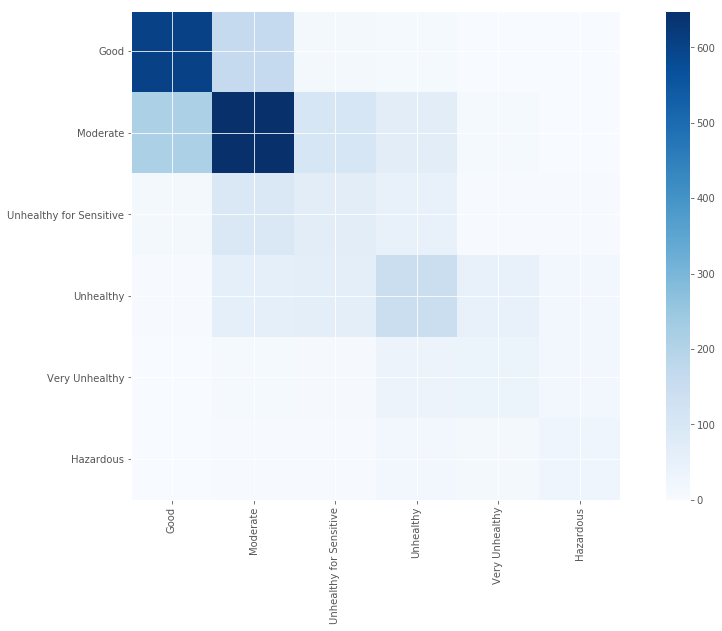

In [142]:
columns = ['Good','Moderate','Unhealthy for Sensitive','Unhealthy','Very Unhealthy','Hazardous']

plt.imshow(confusion_tree, cmap=plt.cm.Blues, interpolation='nearest')
plt.xticks([0,1,2,3,4,5], columns, rotation='vertical')
plt.yticks([0,1,2,3,4,5], columns)
plt.colorbar()

plt.show()

# Evaluate Models

Let's compare all of our models scores. The regression and classification models are scored differently, with regression using r-squared and the classification models using an accuracy score. We can at the very least compare models of the same type.

In [143]:
print("Classification models:")
print("Multiclass neural network score: ", multiclass_neural_network_score)
print("Logistic regression score: ", logistic_regression_score)
print("Random forest score: ", rf_score)
print("Decision tree score: ", tree_score)

Classification models:
Multiclass neural network score:  0.683411214953
Logistic regression score:  0.630841121495
Random forest score:  0.682632398754
Decision tree score:  0.593068535826
